In [1]:
import math
import random
from typing import Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
random.seed(10)

In [2]:
import pickle
from pathlib import Path

# Structure: (theta, phi) -> (theta_etilt, phi_scan)
saved_tp = dict()
saved_tp_file = Path("t0p0.pkl")
if saved_tp_file.is_file():
    with open(saved_tp_file, "rb") as f:
        saved_tp = pickle.load(f)
        
# Structure: (segment, polygon) -> (boolean True or False)
saved_los = dict()

saved_los_file = Path("los.pkl")
if saved_los_file.is_file():
    with open(saved_los_file, "rb") as f:
        saved_los = pickle.load(f)

In [3]:
!pip install Geometry3D shapely

In [4]:
from Geometry3D import *
from shapely import geometry

In [5]:
data = pd.read_csv("C:\\Users\\tniloy\\Downloads\\opencellid dataset\\310.csv", names=['radio', 'mcc', 'mnc', 'lac', 'cid', 'unit', 'longitude', 'latitude', 'range', 'samples', 'changeable', 'created', 'updated', 'averageSignal'])

In [6]:
data.head (10)

radio  mcc  mnc    lac    cid  unit  longitude   latitude  range  samples  \
0   GSM  310  260  32192  22568     0 -73.858566  40.898438   1779       12   
1   GSM  310  260  22629  61562     0 -95.876501  41.286475   3367       17   
2   GSM  310  260  51052  44152     0 -71.084483  42.381728   1000       44   
3   GSM  310  260  51051  40311     0 -71.085559  42.381356   1000       52   
4   GSM  310  260   5973  60092     0 -95.570630  29.735371   1000       22   
5   GSM  310  410  19007   7133     0 -87.258205  40.153886  19135        6   
6   GSM  310  410  53005  50671     0 -95.563889  30.280380   1000        1   
7   GSM  310  260  46136  15418     0 -76.999741  39.160080   1000        1   
8   GSM  310  410  27672  59021     0 -81.741964  26.213691   1000       11   
9   GSM  310  260   5973  50942     0 -95.560226  29.736557   1000        6   

   changeable     created     updated  averageSignal  
0           1  1459696254  1489125559              0  
1           1  1459810860  1609205988              0  
2           1  1459812328  1514115939              0  
3           1  1459812328  1527695374              0  
4           1  1459692332  1490851584              0  
5           1  1459699529  1472415099              0  
6           1  1459775023  1459775023              0  
7           1  1459663271  1459663271              0  
8           1  1459687298  1491031828              0  
9           1  1459692332  1469493454              0

In [7]:
# center_x = 0
# center_y = 0
# center_z = 0
# FSS POsition:
lat_FSS= 37.20250
lon_FSS= -80.43444
R  = 6.371e6  #Radius of the earth

x_FSS = R * math.cos(math.radians(lat_FSS)) * math.cos(math.radians(lon_FSS))
y_FSS = R * math.cos(math.radians(lat_FSS)) * math.sin(math.radians(lon_FSS))
z_FSS = R * math.sin(math.radians(lat_FSS))

print("X, Y, Z = "+ str([x_FSS, y_FSS, z_FSS]))


radius=5000 #radius of the inclusion zone
latitude_range = radius / 110574
longitude_range = radius/(111320*math.cos(math.radians(latitude_range)))
print("Total area of inclusion zone is = " + str(radius*radius*math.pi))

X, Y, Z = [843264.3231973607, -5003968.368478095, 3852122.3823358943]
Total area of inclusion zone is = 78539816.33974482


In [8]:
print(latitude_range)
print(longitude_range)

0.04521858664785573
0.044915572737550945


In [9]:
data_within_zone = data[(data['radio'] == 'GSM') & (data['longitude'] <= (lon_FSS + longitude_range)) & (data['longitude'] >= (lon_FSS - longitude_range)) & (data['latitude'] <= (lat_FSS + latitude_range)) & (data['latitude'] >= (lat_FSS - latitude_range))]

data_within_zone.head(10)

radio  mcc  mnc    lac    cid  unit  longitude   latitude  range  \
780410    GSM  310  260  37630  43582     0 -80.393175  37.196127   8733   
1813932   GSM  310  260  32453  43561     0 -80.421524  37.189560   1000   
1813934   GSM  310  260  32453  43602     0 -80.410309  37.233810   1000   
1814053   GSM  310  260  32453  43822     0 -80.406704  37.227516   1000   
1814075   GSM  310  260  32453  43583     0 -80.461073  37.203233   2207   
1814213   GSM  310  260  32453  43581     0 -80.409897  37.217972   1000   
1814220   GSM  310  260  32453  43601     0 -80.425186  37.236099   1000   
1814361   GSM  310  260  32453  43562     0 -80.391645  37.165063   1000   
1814366   GSM  310  260  32453  43603     0 -80.425415  37.222710   1000   
1814368   GSM  310  260  32453  43621     0 -80.393486  37.224279   1033   

         samples  changeable     created     updated  averageSignal  
780410      3992           1  1413757287  1435049916              0  
1813932        9           1  1458834001  1491931840              0  
1813934        6           1  1458834001  1479555225              0  
1814053        8           1  1458834001  1479576548              0  
1814075       15           1  1458834001  1477155991              0  
1814213        5           1  1458834001  1473235293              0  
1814220        6           1  1458834001  1473191254              0  
1814361       11           1  1458834001  1489446412              0  
1814366        4           1  1458834001  1474352285              0  
1814368       56           1  1458834001  1482422269              0

In [10]:
len(data_within_zone)

33

In [11]:
import json
with open ('C:\\Users\\tniloy\\Downloads\\export (1).geojson') as f:
    df=json.load(f)
    data1=pd.json_normalize(df,record_path=['features'])
data1.head(10)

type               id   properties.@id properties.addr:housenumber  \
0  Feature  relation/308029  relation/308029                         630   
1  Feature  relation/548333  relation/548333                         NaN   
2  Feature  relation/548339  relation/548339                         NaN   
3  Feature  relation/548344  relation/548344                        1406   
4  Feature  relation/548347  relation/548347                         NaN   
5  Feature  relation/548348  relation/548348                         NaN   
6  Feature  relation/548371  relation/548371                        1416   
7  Feature  relation/548372  relation/548372                         900   
8  Feature  relation/548373  relation/548373                         NaN   
9  Feature  relation/548386  relation/548386                         NaN   

        properties.addr:street properties.building properties.height  \
0  Washington Street Southwest           dormitory              15.7   
1                          NaN                 yes               NaN   
2                          NaN                 yes               NaN   
3                   Giles Road              church               NaN   
4                          NaN                 yes               NaN   
5                          NaN         residential               NaN   
6                 Palmer Drive            detached               NaN   
7               Dickerson Lane            detached               NaN   
8                          NaN                 yes               NaN   
9                          NaN                 yes               NaN   

                    properties.name properties.operator properties.type  ...  \
0                    Pritchard Hall       Virginia Tech    multipolygon  ...   
1                               NaN                 NaN    multipolygon  ...   
2                               NaN                 NaN    multipolygon  ...   
3  Blacksburg First Wesleyan Church                 NaN    multipolygon  ...   
4                               NaN                 NaN    multipolygon  ...   
5                               NaN                 NaN    multipolygon  ...   
6                               NaN                 NaN    multipolygon  ...   
7                               NaN                 NaN    multipolygon  ...   
8                               NaN                 NaN    multipolygon  ...   
9                               NaN                 NaN    multipolygon  ...   

  properties.automatic_door properties.access properties.button_operated  \
0                       NaN               NaN                        NaN   
1                       NaN               NaN                        NaN   
2                       NaN               NaN                        NaN   
3                       NaN               NaN                        NaN   
4                       NaN               NaN                        NaN   
5                       NaN               NaN                        NaN   
6                       NaN               NaN                        NaN   
7                       NaN               NaN                        NaN   
8                       NaN               NaN                        NaN   
9                       NaN               NaN                        NaN   

  properties.door properties.operator:short properties.operator:type  \
0             NaN                       NaN                      NaN   
1             NaN                       NaN                      NaN   
2             NaN                       NaN                      NaN   
3             NaN                       NaN                      NaN   
4             NaN                       NaN                      NaN   
5             NaN                       NaN                      NaN   
6             NaN                       NaN                      NaN   
7             NaN                       NaN                      NaN   
8         

In [12]:
data1[data1["properties.height"].notnull()].head(20)

type                id    properties.@id properties.addr:housenumber  \
0     Feature   relation/308029   relation/308029                         630   
33    Feature  relation/1360465  relation/1360465                         NaN   
34    Feature  relation/1360466  relation/1360466                         NaN   
35    Feature  relation/1360467  relation/1360467                         NaN   
36    Feature  relation/1360468  relation/1360468                         NaN   
37    Feature  relation/1360469  relation/1360469                         NaN   
66    Feature      way/26210227      way/26210227                         NaN   
67    Feature      way/26210236      way/26210236                         285   
69    Feature      way/32709325      way/32709325                         570   
98    Feature      way/32953606      way/32953606                         210   
100   Feature      way/32954439      way/32954439                         NaN   
101   Feature      way/32954440      way/32954440                         NaN   
113   Feature      way/43082481      way/43082481                         NaN   
114   Feature      way/43310773      way/43310773                         155   
1678  Feature      way/54784074      way/54784074                         NaN   
7626  Feature      way/55760105      way/55760105                         185   
7627  Feature      way/55861902      way/55861902                         NaN   
7631  Feature      way/60193821      way/60193821                         180   
7632  Feature      way/60193822      way/60193822                         NaN   
7636  Feature      way/60193832      way/60193832                         NaN   

           properties.addr:street properties.building properties.height  \
0     Washington Street Southwest           dormitory              15.7   
33                            NaN          university             14.86   
34                            NaN           dormitory             14.86   
35                            NaN           dormitory             11.27   
36                            NaN           dormitory             33.59   
37                            NaN           dormitory             14.86   
66                            NaN          university             15.47   
67                   Ag Quad Lane          university             11.57   
69    Washington Street Southwest           dormitory             25.82   
98               Drillfield Drive          university             11.61   
100                           NaN           dormitory             14.56   
101                           NaN                 yes             18.78   
113                           NaN          university              23.9   
114                  Ag Quad Lane          university             19.91   
1678                          NaN          university              13.4   
7626                 Ag Quad Lane          university             20.41   
7627                          NaN          university             37.39   
7631                  Kent Street           dormitory             12.42   
7632                          NaN           dormitory              21.3   
7636                          NaN          university             15.09   

           properties.name properties.operator properties.type  ...  \
0           Pritchard Hall       Virginia Tech    multipolygon  ...   
33     East Eggleston Hall       Virginia Tech    multipolygon  ...   
34     West Eggleston Hall       Virginia Tech    multipolygon  ...   
35            Slusher Wing       Virginia Tech    multipolygon  ...   
36           Slusher Tower       Virginia Tech    multipolygon  ...   
37     Main Eggleston Hall       Virginia Tech    multipolygon  ...   
66           Cheatham Hall       Virginia Tech             NaN  ...   
67           Dietrick Hall       Virginia Tech             NaN  ...   
69               Hoge Hall       Virginia Tech             NaN  ...   
98              Sandy

In [13]:
data1["geometry.coordinates"].head(10)

0    [[[-80.4194702, 37.2238774], [-80.4194505, 37....
1    [[[-80.4070717, 37.2320238], [-80.4069865, 37....
2    [[[-80.4068521, 37.2319488], [-80.4069373, 37....
3    [[[-80.4104274, 37.2506844], [-80.4104412, 37....
4    [[[-80.4355296, 37.2138316], [-80.4355103, 37....
5    [[[-80.4416012, 37.2238365], [-80.4417281, 37....
6    [[[-80.3924701, 37.2185727], [-80.3923812, 37....
7    [[[-80.4121293, 37.2397986], [-80.4121648, 37....
8    [[[-80.4075916, 37.2253453], [-80.4076676, 37....
9    [[[-80.4071473, 37.2322051], [-80.4072218, 37....
Name: geometry.coordinates, dtype: object

In [14]:
class Building:
    def __init__(self, coordinates=None, height=None):
        self.coordinates = []
        if coordinates is not None:
            self.coordinates = coordinates
        
        if height is None or not str(height).isdigit():
            self.height = random.uniform(10, 40)
        else:
            self.height = height
        
        self.x_coord, self.y_coord, self.z_coord = self.latlon_to_XYZ()
        
        self.points = []
        for i in range(len(self.x_coord)):
            x, y, z = self.x_coord[i], self.y_coord[i], self.z_coord[i]
            self.points.append(Point(x,y,z))
        
        self.xy_points = np.array([(p.x, p.y) for p in self.points])
        self.xy_polygon = geometry.Polygon(self.xy_points)
        
        self.wall_polygons = self.get_wall_polygons()
    
    def latlon_to_XYZ(self):
        x_coord = np.array([])
        y_coord = np.array([])
        z_coord = np.array([])
        
        # bottom points of building at each coordinate
        for lon, lat in self.coordinates:
            x = R * math.cos(math.radians(lat)) * math.cos(math.radians(lon))
            y = R * math.cos(math.radians(lat)) * math.sin(math.radians(lon))
            x_coord = np.append(x_coord, x)
            y_coord = np.append(y_coord, y)
            z_coord = np.append(z_coord, 0)
            # z_coord = np.append(z_coord, self.height)
            
        # make coordinates to relative to FSS position
        x_coord -= x_FSS
        y_coord -= y_FSS
        
        return x_coord, y_coord, z_coord

    def get_wall_polygons(self):
        polygons = []

        # points = [Point(x,y,0) for x,y in p.boundary.coords]
        # polygons.append(ConvexPolygon(points))
        points = [Point(x,y,self.height) for x,y in self.xy_polygon.boundary.coords]
        # polygons.append(ConvexPolygon(points))

        for i in range(len(points)-1):
            high_point_1 = points[i]
            high_point_2 = points[i + 1]
            low_point_1 = Point(high_point_1.x, high_point_1.y, 0)
            low_point_2 = Point(high_point_2.x, high_point_2.y, 0)

            poly_points = [low_point_1, low_point_2, high_point_1, high_point_2]
            #print(poly_points)
            polygons.append(ConvexPolygon(poly_points))
            
        return polygons
        

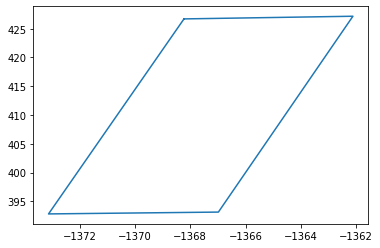

In [15]:
from shapely import geometry

b = Building(data1.iloc[500]["geometry.coordinates"][0], data1.iloc[500]["properties.height"])
x, y = b.xy_polygon.boundary.xy
plt.plot(x, y)

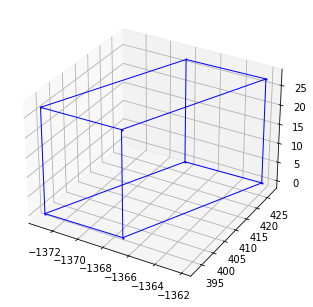

In [16]:
r = Renderer(backend='matplotlib')
for p in b.wall_polygons:
    r.add((p,'b',1),normal_length=0)
r.show()

In [17]:
from tqdm import tqdm
buildings = []

for i in tqdm(range(len(data1))):
    for coords in data1.iloc[i]["geometry.coordinates"]:
        try:
            buildings.append(Building(coords, data1.iloc[i]["properties.height"]))
        except:
            print(f"Skipping building {i}")

  0%|▎                                                                               | 37/8644 [00:00<01:45, 81.95it/s]

Skipping building 26
Skipping building 26
Skipping building 27
Skipping building 27
Skipping building 27
Skipping building 28
Skipping building 28
Skipping building 29
Skipping building 29
Skipping building 29
Skipping building 29
Skipping building 29
Skipping building 29
Skipping building 29
Skipping building 29
Skipping building 29
Skipping building 29
Skipping building 29


  1%|▋                                                                               | 69/8644 [00:00<01:41, 84.56it/s]

Skipping building 53
Skipping building 53
Skipping building 53
Skipping building 53


100%|█████████████████████████████████████████████████████████████████████████████| 8644/8644 [00:43<00:00, 197.06it/s]

Skipping building 8165
Skipping building 8165
Skipping building 8165
Skipping building 8165
Skipping building 8165
Skipping building 8165
Skipping building 8165
Skipping building 8165
Skipping building 8165
Skipping building 8166
Skipping building 8166
Skipping building 8166
Skipping building 8166
Skipping building 8166
Skipping building 8166
Skipping building 8166
Skipping building 8166
Skipping building 8166
Skipping building 8166
Skipping building 8166
Skipping building 8166
Skipping building 8167
Skipping building 8167
Skipping building 8167
Skipping building 8167
Skipping building 8167
Skipping building 8167
Skipping building 8167
Skipping building 8167
Skipping building 8168
Skipping building 8168
Skipping building 8168
Skipping building 8168
Skipping building 8168
Skipping building 8168
Skipping building 8169
Skipping building 8169
Skipping building 8169
Skipping building 8169
Skipping building 8169
Skipping building 8170
Skipping building 8170
Skipping building 8170
Skipping bu

In [18]:
class FSS_Channels:
  # channels start at 0, so a channel plan with 8 channels is from 0 to 7

  band_width = 240e6 # 240MHz

  # 10.7-12.7 GHz frequency range
  range_start = 10.7e9 # 10.7GHz
  range_end = 12.7e9 # 12.7GHz

  channel_count = 8

  range_size = range_end - range_start
  unused_space = range_size - band_width * channel_count

  # FSS channel spacing should be 10MHz
  space_between_channels = unused_space / channel_count

  @staticmethod
  def getChannelRange(channel) -> Tuple[int, int]:
    channel_start = int((0.5 + channel) * FSS_Channels.space_between_channels + channel * FSS_Channels.band_width)
    channel_end = channel_start + FSS_Channels.band_width
    return channel_start, channel_end

  def __init__(channel):
    self.channel = channel

In [19]:
class BS_Channels:
  # channels start at 1, so a channel plan with 5 channels is from 1 to 5

  band_width = 100e6 # 100MHz

  # 12.2-12.7 GHz frequency range
  range_start = 12.2e9 # 12.2GHz
  range_end = 12.7e9 # 12.7GHz

  channel_count = 5

  range_size = range_end - range_start
  unused_space = range_size - band_width * channel_count

  # BS channel spacing should be 0MHz
  space_between_channels = unused_space / channel_count

  @staticmethod
  def getChannelRange(channel) -> Tuple[int, int]:
    channel -= 1
    
    channel_start = int((0.5 + channel) * BS_Channels.space_between_channels + channel * BS_Channels.band_width)
    channel_end = channel_start + BS_Channels.band_width
    return channel_start, channel_end

  def __init__(channel):
    self.channel = channel

In [20]:
class BS:
  def __init__(self, radius, max_height, carr_freq, interference_type):
    self.radius = radius
    self.max_height = max_height
    self.carr_freq = carr_freq
    self.interference_type = interference_type
    self.base_heights = {
        'UMi': 10,
        'UMa': 25,
        'RMa': 35,
        None: random.randint(10, 35)
    }
    self.BS_x = random.randint(-4000,4000) + 1000*random.random()
    self.BS_y = random.randint(-4000,4000) + 1000*random.random()
    self.BS_z = self.base_heights[self.interference_type]

  def BS_random_co_ordinates(self):
    return self.BS_x, self.BS_y, self.BS_z
 
  def UE_random_co_ordinates(self):
    UE_x = random.randint(-4000,4000) + 1000*random.random()
    UE_y = random.randint(-4000,4000) + 1000*random.random()
    UE_z = random.uniform(0,1.5)
    
    return UE_x, UE_y, UE_z

# Creating the FSS class
  def FSS_random_co_ordinates(self):

    FSS_x = random.randint(-4000,4000) + 1000*random.random()
    FSS_y = random.randint(-4000,4000) + 1000*random.random()
    FSS_z = random.choice([1.5,4.5])
    
    return FSS_x, FSS_y, FSS_z


In [21]:
def path_loss_UMi(BS_X,BS_Y,BS_Z,FSS_X,FSS_Y,FSS_Z):
##UMi
##LOS,SF=4:

##(10m<=d_2D)<=D_BP:
    h=5
    d_2D=math.sqrt(((FSS_X-BS_X)**2)+((FSS_Y-BS_Y)**2)+((FSS_Z-BS_Z)**2))
    hBs=10
    fc=12e3
    d_3D=math.sqrt(hBs**2+d_2D**2)
    PL1umi=32.4+21*math.log10(d_3D)+20*math.log10(fc)
    
##(D_BP<=d_2D)<=5000m:
    hBs=10
    hUT=1.5
    hE=1
    hBs1=hBs-hE
    hUT1=hUT-hE
    c=3*10**8
    D_BP= (4*hBs1*hUT1*fc)/c
    PL2umi=32.4+40*math.log10(d_3D)+20*math.log10(fc)-9.5*math.log10((D_BP)**2+(hBs-hUT)**2)
    
    if 10 <=d_2D and d_2D<=D_BP:
        PLUMiLOS=PL1umi
    elif D_BP<=d_2D and  d_2D<=5000:
        PLUMiLOS= PL2umi  
    else:
        PLUMiLOS=1

##NLOS,SF=7.82:
    PL1umiNLOS= 35.3*math.log10(d_3D)+22.4+21.3*math.log10(fc)-0.3*(hUT-1.5)
    PLUMiNLOS= max(PL2umi,PL1umiNLOS)
    
    line_of_sight = True
    
##realistic pathloss:
    bs_to_fss_segment = Segment(Point(BS_X, BS_Y, BS_Z), Point(FSS_X, FSS_Y, FSS_Z))
    for i in tqdm(range(len(buildings))):
#     for i in range(len(buildings)):
        for polygon in buildings[i].wall_polygons:
            if (hash(bs_to_fss_segment), hash(polygon)) in saved_los:
                if saved_los.get((hash(bs_to_fss_segment), hash(polygon))):
                    path_loss_UMi = PLUMiNLOS
                    line_of_sight = False
                else:
                    path_loss_UMi = PLUMiLOS
#                     line_of_sight = True
    
 # intersection(line, polygon): [Intersection], None
            elif intersection(bs_to_fss_segment, polygon) is not None:
                path_loss_UMi = PLUMiNLOS
                line_of_sight = False
                saved_los[(hash(bs_to_fss_segment), hash(polygon))] = True
            else:
                path_loss_UMi = PLUMiLOS
#                 line_of_sight = True
                saved_los[(hash(bs_to_fss_segment), hash(polygon))] = False
    
# #Loss Probability:
#     if d_2D>18:
#         PrLosUmi=(18/d_2D)+math.exp((-(d_2D/36))*(1-(18/d_2D)))     
#     else:
#         PrLosUmi=1 ##d_2d<=18     
#     if PrLosUmi > random.random():
#         path_loss_UMi = PLUMiLOS   
#     else:
#         path_loss_UMi = PLUMiNLOS   
##path_loss 
#     path_loss_UMi= PL2umi*PrLosUmi+PL1umiNLOS*(1-PrLosUmi)
    
    return path_loss_UMi, d_2D, line_of_sight

In [22]:
def path_loss_UMa(BS_X,BS_Y,BS_Z,FSS_X,FSS_Y,FSS_Z):
##LOS,SF=4:
##(10m<=d_2D)<=D_BP:
    fc=12e3
    h=5
    d_2D=math.sqrt(((FSS_X-BS_X)**2)+(FSS_Y- BS_Y)**2)+((FSS_Z-BS_Z)**2)
    hBs=25
    d_3D=math.sqrt(hBs**2+d_2D**2)
    PL3uma=28.0+22*math.log10(d_3D)+20*math.log10(fc)
    
##(D_BP<=d_2D) <=5000m:
    hUT=1.5
    hE=1
    hBs1=hBs-hE
    hUT1=hUT-hE
    c=3*10**8
    D_BP= (4*hBs1*hUT1*fc)/c
    PL4uma=28.0+40*math.log10(d_3D)+20*math.log10(fc)-9*math.log10((D_BP)**2+(hBs-hUT)**2)
    
    if 10 <=d_2D and d_2D<=D_BP:
        PLUMALOS=PL3uma
    elif D_BP<=d_2D and d_2D<=5000:
         PLUMALOS= PL4uma  
    else:
        PLUMALOS=1
        
##NLOS,SF=6:
    PL1NLOSuma=13.54+39.08*math.log10(d_3D)+20*math.log10(fc)-0.6*(hUT-1.5)
    PLUMANLOS=max(PL4uma,PL1NLOSuma)
    
    line_of_sight = True

##NLOS,SF=7.8 (optional)
##PL_Optional=32.4+20*math.log(fc)+30*math.log(d_3D)


##realistic pathloss:
    bs_to_fss_segment = Segment(Point(BS_X, BS_Y, BS_Z), Point(FSS_X, FSS_Y, FSS_Z))
    for i in tqdm(range(len(buildings))):
#     for i in range(len(buildings)):
        for polygon in buildings[i].wall_polygons:
            if (hash(bs_to_fss_segment), hash(polygon)) in saved_los:
                if saved_los.get((hash(bs_to_fss_segment), hash(polygon))):
                    path_loss_UMa = PLUMANLOS
                    line_of_sight = False
                else:
                    path_loss_UMa = PLUMALOS
#                     line_of_sight = True
                
            elif intersection(bs_to_fss_segment, polygon) is not None:
                path_loss_UMa = PLUMANLOS
                line_of_sight = False
                saved_los[(hash(bs_to_fss_segment), hash(polygon))] = True
            else:
                path_loss_UMa = PLUMALOS
#                 line_of_sight = True
                saved_los[(hash(bs_to_fss_segment), hash(polygon))] = False


##Loss Probability:
#     if d_2D >18:
#         if hUT<=13:
#             ChUT=0
#         elif 13<hUT and hUT<=23:
#             ChUT=((hUT-13)/10)**1.5  
#         PrLOSUma=((18/d_2D)+math.exp((-(d_2D/63))*(1-(18/d_2D))))*(1+ChUT*(5/4)*((d_2D/100)**3)*math.exp(-(d_2D/150)))
#     else:##18m<d_2D:
#         PrLOSUma=1
        
#     if PrLOSUma > random.random():
#         path_loss_UMa = PLUMALOS
    
#     else:
#         path_loss_UMa = PLUMANLOS
    
##Path Loss
#     path_loss_UMa= PL4uma*PrLOSUma+PL1NLOSuma*(1-PrLOSUma)
    return path_loss_UMa, d_2D, line_of_sight

In [23]:
def path_loss_RMa(BS_X,BS_Y,BS_Z,FSS_X,FSS_Y,FSS_Z):
##LOS,SF=4(PL1),SF=6(PL2)
##10m<=d_2D<=d_BP: 
    fc=12e3
    h=5
    d_2D=math.sqrt(((FSS_X-BS_X)**2)+((FSS_Y- BS_Y)**2)+((FSS_Z-BS_Z)**2))
    hBs=35
    d_3D= math.sqrt(hBs**2+d_2D**2)
    PL1rma=20*math.log10((40*math.pi*d_3D*fc)/3)+ min(0.03*h**1.72,10)*math.log10(d_3D)-min(0.044*h**1.72,14.77)+0.002*math.log10(h)*d_3D
    
##d_BP<=d_2D<=10km:
    hUT=1.5
    c=3*10**8
    d_BP= (2*math.pi*hBs*hUT*fc)/c
    PL2rma= PL1rma*(d_BP)+40*math.log10(d_3D/d_BP)

    if 10<=d_2D and d_2D <=d_BP:
        PLRMALOS=PL1rma
    elif d_BP<=d_2D and d_2D <=10000:
        PLRMALOS= PL2rma  
    else:
        PLRMALOS=1

##NLOS,SF=8:
    W=20
    h=5
    PL1NLOSrma= 161.04-7.11*math.log10(W)+7.5*math.log10(h)-(24.37-3.7*(h/hBs)**2)*math.log10(hBs)+(43.42-3.1*math.log10(hBs))*(math.log10(d_3D)-3)+20*math.log10(fc)-(3.2*(math.log10(11.75*hUT))**2-4.97)
    PLRMANLOS=max(PL2rma,PL1NLOSrma)
    
    line_of_sight = True
    
##realistic pathloss:
    bs_to_fss_segment = Segment(Point(BS_X, BS_Y, BS_Z), Point(FSS_X, FSS_Y, FSS_Z))
    for i in tqdm(range(len(buildings))):
#     for i in range(len(buildings)):
        for polygon in buildings[i].wall_polygons:
            if (hash(bs_to_fss_segment), hash(polygon)) in saved_los:
                if saved_los.get((hash(bs_to_fss_segment), hash(polygon))):
                    path_loss_RMa = PLRMANLOS
                    line_of_sight = False
                else:
                    path_loss_RMa = PLRMALOS
                    # line_of_sight = True
   
            elif intersection(bs_to_fss_segment, polygon) is not None:
                path_loss_RMa = PLRMANLOS
                line_of_sight = False
                saved_los[(hash(bs_to_fss_segment), hash(polygon))] = True
            else:
                path_loss_RMa = PLRMALOS
                # line_of_sight = True
                saved_los[(hash(bs_to_fss_segment), hash(polygon))] = False
                
    

# ##Loss Probability:
#     if d_2D>10:
#         PrLOSrma=math.exp(-((d_2D-10)/1000))
        
# ## 10m<d_2D:
#     else:
#         PrLOSrma=1
        
#     if PrLOSrma > random.random():
#         path_loss_RMa= PLRMALOS
    
#     else:
#         path_loss_RMa = PLRMANLOS

##PathLoss:
#     path_loss_RMa=PL2rma*PrLOSrma+PL1NLOSrma*(1-PrLOSrma)
    return path_loss_RMa, d_2D,  line_of_sight

In [24]:
def Interface_UMi_1(BS_X,BS_Y,BS_Z,FSS_X,FSS_Y,FSS_Z,FSS_phi,pathloss_UMi,theta_tilt,phi_scan,output=False):
        LBodyLoss=4
#         LSpectralOverlap=10*math.log(10)
        # theta_tilt, phi_scan = max_gain_5g_parameters(theta, phi)
        x, y, z = BS_X-FSS_X, BS_Y-FSS_Y, BS_Z-FSS_Z

        theta_bs_es = math.degrees(math.atan(y/x)) % 360
        phi_bs_es = math.degrees(math.sqrt(x**2 + y**2) / z) % 360
        fss_phi_difference = abs(FSS_phi - phi_bs_es)
        if output: print("theta_bs_es:", theta_bs_es, "phi_bs_es:", phi_bs_es)

        G_5G_R=gain_5g(theta_bs_es, phi_bs_es, theta_tilt, phi_scan)
        G_Rx_5G=gain_fss_wbes_b(fss_phi_difference)

        TXPower=41.3
#         LBuildingLoss=1
        interface1=TXPower+ G_5G_R-pathloss_UMi- LBodyLoss + G_Rx_5G
        return interface1,pathloss_UMi

In [25]:
def Interface_UMa_1(BS_X,BS_Y,BS_Z,FSS_X,FSS_Y,FSS_Z,FSS_phi,pathloss_UMa,theta_tilt,phi_scan,output=False):
        LBodyLoss=4
#         LSpectralOverlap=10*math.log(10)
        x, y, z = BS_X-FSS_X, BS_Y-FSS_Y, BS_Z-FSS_Z

        theta_bs_es = math.degrees(math.atan(y/x)) % 360
        phi_bs_es = math.degrees(math.sqrt(x**2 + y**2) / z) % 360
        fss_phi_difference = abs(FSS_phi - phi_bs_es)
        # if output: print("theta_bs_es:", theta_bs_es, "phi_bs_es:", phi_bs_es)

        G_5G_R=gain_5g(theta_bs_es, phi_bs_es, theta_tilt, phi_scan)
        G_Rx_5G=gain_fss_wbes_b(fss_phi_difference)
        
        TXPower=41.3
#         LBuildingLoss=1
        interface2=TXPower+ G_5G_R-pathloss_UMa- LBodyLoss + G_Rx_5G
        return interface2,pathloss_UMa

In [26]:
def Interface_RMa_1(BS_X,BS_Y,BS_Z,FSS_X,FSS_Y,FSS_Z,FSS_phi,pathloss_RMa,theta_tilt,phi_scan,output=False):
        LBodyLoss=4
#         LSpectralOverlap=10*math.log(10)
        x, y, z = BS_X-FSS_X, BS_Y-FSS_Y, BS_Z-FSS_Z

        theta_bs_es = math.degrees(math.atan(y/x)) % 360
        phi_bs_es = math.degrees(math.sqrt(x**2 + y**2) / z) % 360
        # if output: print("theta_bs_es:", theta_bs_es, "phi_bs_es:", phi_bs_es)
        fss_phi_difference = abs(FSS_phi - phi_bs_es)
        if output: print("fss_phi_difference:", fss_phi_difference)

        G_5G_R=gain_5g(theta_bs_es, phi_bs_es, theta_tilt, phi_scan)
        G_Rx_5G=gain_fss_wbes_b(fss_phi_difference)
        
        TXPower=41.3
#         LBuildingLoss=1
        interface3=TXPower+ G_5G_R-pathloss_RMa-LBodyLoss + G_Rx_5G
        return interface3,pathloss_RMa

In [27]:
k = 1.38064852*10**(-23)
T=200
B=240e6
Noise = 10*math.log10(k*T*B)
Noise_W = 10 ** (Noise / 10)
print('Noise:', Noise)
print('Noise in Watts:', Noise_W)

Noise: -121.78675630934148
Noise in Watts: 6.627112895999999e-13


In [28]:
bs_ue_max_radius = 1000
bs_ue_min_radius= 1
base_station_count=33

fss1 = BS(radius, max_height=1.5, carr_freq=12e3, interference_type=None)
x,y,z = 0,0,0

FSS_phi = {
    'UMi': 15,
    'UMa': 48,
    'RMa': 5
}
        
def simulate(output=True):
    FSS_X=np.array([])
    FSS_Y=np.array([])
    FSS_Z=np.array([])
    FSS_CHANNELS = []
    for i in range (1):
        FSS_X = np.append(FSS_X, x)
        FSS_Y = np.append(FSS_Y, y)
        FSS_Z = np.append(FSS_Z, z)
        # 0 means not in use, 1 means in use
        channel_status = [random.randint(0, 1) for i in range(FSS_Channels.channel_count)]
        channels_used = np.array([i for i in range(FSS_Channels.channel_count) if channel_status[i] == 1])
        FSS_CHANNELS.append(channels_used)
        if output: print("FSS Co-ordinates=" +str (x)+ "," + str(y)+ "," + str(z) + ", channel: " + str(channels_used))
    if output: print(FSS_X, FSS_Y, FSS_Z, FSS_CHANNELS)

    # Create base stations
    BS_X=np.array([])
    BS_Y=np.array([])
    BS_Z=np.array([])
    
    # Randomly select base stations 
    # base_station_indexes = random.sample(range(len(data_within_zone)), base_station_count)

    # for i in base_station_indexes:
    for i in range(base_station_count):
        lat_BS, lon_BS = data_within_zone.iloc[i]['latitude'], data_within_zone.iloc[i]['longitude']
        bs1 = BS(radius, max_height=35, carr_freq=12e3, interference_type=None)
        x_BS = R * math.cos(math.radians(lat_BS)) * math.cos(math.radians(lon_BS))
        y_BS = R * math.cos(math.radians(lat_BS)) * math.sin(math.radians(lon_BS))
#         z_BS = R * math.sin(math.radians(lat_BS))

        BS_X = np.append(BS_X, x_BS - x_FSS)
        BS_Y = np.append(BS_Y, y_BS - y_FSS)
        BS_Z = np.append(BS_Z, 0)
        if output: print("Bs Co-ordinates=" +str (x_BS)+ "," + str(y_BS)+ "," + str(z_BS))
    
    if output: print(BS_X,BS_Y,BS_Z)

    # Create user equipment
    UE_X=np.array([])
    UE_Y=np.array([])
    UE_Z=np.array([])
    UE_CHANNEL=np.array([])
    for p in range (len(BS_X)):
        for i in range(3):
    # number of split regions
    # i is the sector number
            for j in range(10):
      # number of UEs per region
      # j is the number of the UE in one sector
                bs_x, bs_y, bs_z = BS_X[p], BS_Y[p],BS_Z[p]
                theta_bs_ue = random.uniform(120 * i, 120 * (i+1))
                # 0-120, 120-240, 240-360
                radius_bs_ue = random.uniform(bs_ue_min_radius, bs_ue_max_radius)

                x1 = bs_x + radius_bs_ue * math.cos(math.radians(theta_bs_ue))
                y1 = bs_y + radius_bs_ue * math.sin(math.radians(theta_bs_ue))

                UE_X = np.append(UE_X, x1)
                UE_Y = np.append(UE_Y, y1)
                UE_Z = np.append(UE_Z, 1.5)

                maximum_UEs_per_channel = 4

                if j > maximum_UEs_per_channel * BS_Channels.channel_count:
                    raise Exception(f"BS cannot support {j} UEs")

                count = {i: 0 for i in range(1, BS_Channels.channel_count + 1)}

                channel = random.randint(1, BS_Channels.channel_count)

                while count[channel] >= maximum_UEs_per_channel:
                    channel = random.randint(1, BS_Channels.channel_count)

                count[channel] += 1

                UE_CHANNEL = np.append(UE_CHANNEL, channel)

                if output: print("UE Co-ordinates=" +str (x1)+ "," + str(y1)+ "," + str(z1) + ", channel: " + str(channel))
            if output: print(UE_X,UE_Y,UE_Z)
        
    pathloss_UMa=np.empty([0])
    pathloss_UMi=np.empty([0])
    pathloss_RMa=np.empty([0])
    distance_UMa=np.empty([0])
    distance_UMi=np.empty([0])
    distance_RMa=np.empty([0])
    line_of_sight=np.empty([0])
    for i in range(len(BS_X)):
        for j in range (len(FSS_X)):
            pathlossumi,distance,los_single = path_loss_UMi(BS_X[i],BS_Y[i],10,FSS_X[j],FSS_Y[j],FSS_Z[j])
            pathlossuma,distance,los_single = path_loss_UMa(BS_X[i],BS_Y[i],25,FSS_X[j],FSS_Y[j],FSS_Z[j])
            pathlossrma,distance,los_single = path_loss_RMa(BS_X[i],BS_Y[i],35,FSS_X[j],FSS_Y[j],FSS_Z[j])
            if output: print("pathloss umi:", pathlossumi, "uma:", pathlossuma, "rma:", pathlossrma, "for distance", distance)
            
            pathloss_UMa=np.append(pathloss_UMa,pathlossuma)
            distance_UMa=np.append(distance_UMa,distance)
            pathloss_UMi=np.append(pathloss_UMi,pathlossumi)
            distance_UMi=np.append(distance_UMi,distance)
            pathloss_RMa=np.append(pathloss_RMa,pathlossrma)
            distance_RMa=np.append(distance_RMa,distance)
            
            line_of_sight=np.append(line_of_sight,los_single)
            

    if output: print(pathloss_UMi,distance_UMi)
    if output: print(pathloss_UMa,distance_UMa)
    if output: print(pathloss_RMa,distance_RMa)

    interface_UMi_W=np.empty([0])
    interface_UMa_W=np.empty([0])
    interface_RMa_W=np.empty([0])
    for i in range(len(BS_X)):
        interface_UMi_BS=np.empty([0])
        interface_UMa_BS=np.empty([0])
        interface_RMa_BS=np.empty([0])
        for j in range(len(FSS_X)):
            print(f"BS {i}, FSS {j}, pathloss {i*len(FSS_X)+j}")
            for k in range(len(UE_X)):
                # channel check
                # if UE is using channel 1, the start is 12.2GHz and the end is 12.3GHz
                bs_channel_start, bs_channel_end = BS_Channels.getChannelRange(UE_CHANNEL[k])
                bs_channel_range = range(bs_channel_start, int(bs_channel_end + (5e6)), int(5e6))

                interference_found = False

                for fss_channel in FSS_CHANNELS[j]:
                    # if fss_channel >= 6:
                    fss_channel_start, fss_channel_end = FSS_Channels.getChannelRange(fss_channel)
                    fss_channel_range = range(bs_channel_start, int(bs_channel_end + (5e6)), int(5e6))
                    
                    bs_set = set(bs_channel_range)
                    if len(bs_set.intersection(fss_channel_range)):
                        interference_found = True

                if not interference_found:
#                     interface_UMi_W=np.append(interface_UMi_W,0)
#                     interface_UMa_W=np.append(interface_UMa_W,0)
#                     interface_RMa_W=np.append(interface_RMa_W,0)
                    continue

                for interference_type in ["UMi", "UMa", "RMa"]:
                    if interference_type == "UMi":
                        BS_Z = np.array([10 for i in range(len(BS_X))])
                    elif interference_type == "UMa":
                        BS_Z = np.array([25 for i in range(len(BS_X))])
                    elif interference_type == "RMa":
                        BS_Z = np.array([35 for i in range(len(BS_X))])
                    # bs_ue_x, bs_ue_y, bs_ue_z = BS_X-UE_X, BS_Y-UE_Y, BS_Z-UE_Z
                    bs_ue_x, bs_ue_y, bs_ue_z = UE_X[k]-BS_X[i], UE_Y[k]-BS_Y[i], UE_Z[k]-BS_Z[i]

                    theta_bs_ue = np.arctan(bs_ue_y/bs_ue_x)
                    phi_bs_ue = np.sqrt(bs_ue_x**2 + bs_ue_y**2) / bs_ue_z

                    theta_bs_ue = np.degrees(theta_bs_ue) % 360
                    phi_bs_ue = np.degrees(phi_bs_ue) % 360
                    if output: print("theta_bs_ue:", theta_bs_ue, "phi_bs_ue:", phi_bs_ue)

                    theta_tilt, phi_scan = max_gain_5g_parameters(theta_bs_ue, phi_bs_ue)
                    

                    if interference_type == "UMi":
                        interfaceumi,pathloss_UMi_x= Interface_UMi_1(BS_X[i],BS_Y[i],BS_Z[i],FSS_X[j],FSS_Y[j],FSS_Z[j],FSS_phi['UMi'],pathloss_UMi[i*len(FSS_X)+j],theta_tilt,phi_scan)
                        print("UE:", k, "/ interference umi:", interfaceumi, "/ pathloss:", pathlossumi, "/ angle:", FSS_phi['UMi']-phi_bs_ue)
                        interface_UMi_BS=np.append(interface_UMi_BS,interfaceumi)
                    elif interference_type == "UMa":
                        interfaceuma,pathloss_UMa_x= Interface_UMa_1(BS_X[i],BS_Y[i],BS_Z[i],FSS_X[j],FSS_Y[j],FSS_Z[j],FSS_phi['UMa'],pathloss_UMa[i*len(FSS_X)+j],theta_tilt,phi_scan)
                        print("UE:", k, "/ interference uma:", interfaceuma, "/ pathloss:", pathlossuma, "/ angle:", FSS_phi['UMa']-phi_bs_ue)
                        interface_UMa_BS=np.append(interface_UMa_BS,interfaceuma)
                    elif interference_type == "RMa":
                        interfacerma,pathloss_RMa_x= Interface_RMa_1(BS_X[i],BS_Y[i],BS_Z[i],FSS_X[j],FSS_Y[j],FSS_Z[j],FSS_phi['RMa'],pathloss_RMa[i*len(FSS_X)+j],theta_tilt,phi_scan)
                        print("UE:", k, "/ interference rma:", interfacerma, "/ pathloss:", pathlossrma, "/ angle:", FSS_phi['RMa']-phi_bs_ue)
                        interface_RMa_BS=np.append(interface_RMa_BS,interfacerma)
        interface_UMi_W = np.append(interface_UMi_W, np.sum(10 ** (interface_UMi_BS / 10)))
        interface_UMa_W = np.append(interface_UMa_W, np.sum(10 ** (interface_UMa_BS / 10)))
        interface_RMa_W = np.append(interface_RMa_W, np.sum(10 ** (interface_RMa_BS / 10)))
              
    if output: print(interface_UMi_W,pathloss_UMi)
    if output: print(interface_UMa_W,pathloss_UMa)
    if output: print(interface_RMa_W,pathloss_RMa)

    # I_N_UMi = np.array([interfaceumi-Noise for interfaceumi in interface_UMi])
    I_N_UMi = interface_UMi_W / Noise_W
    if output: print('I/N UMi:', I_N_UMi)
    I_N_UMa = interface_UMa_W / Noise_W
    if output: print('I/N UMa:', I_N_UMa)      
    I_N_RMa = interface_RMa_W / Noise_W
    if output: print('I/N RMa:', I_N_RMa)  

    return distance_RMa, I_N_RMa, distance_UMa, I_N_UMa, distance_UMi, I_N_UMi, line_of_sight
        

In [29]:
# Prototype functions to calculate antenna gain of 5G base station and FSS earth station

import math, cmath
from scipy import optimize

# gain is in dBi

# 3GPP TR 38.901
# https://www.etsi.org/deliver/etsi_tr/138900_138999/138901/14.00.00_60/tr_138901v140000p.pdf
antenna_gain_max = 8

# values recommended by Dr. Zoheb
rows = 16  # Nv
cols = 16  # Nh
hspace = 0.5  # dh/λ
vspace = 0.5  # dv/λ

# constant values based on ECC Rep 281
phi_3db = 80  # degrees
theta_3db = 65  # degrees
front_to_back_ratio = 30  # dB
side_lobe_level_limit = 30  # dB

# antenna horizontal pattern
def gain_antenna_element_horizontal(phi) -> float:
    return -min(
                12 * (phi / phi_3db)**2, 
                front_to_back_ratio
            )

# antenna vertical pattern
def gain_antenna_element_vertical(theta) -> float:
    return -min(
                12 * ((theta - 90) / theta_3db)**2,
                side_lobe_level_limit
            )

# antenna element gain of elevation and azimuth plane
def gain_antenna_element(theta, phi) -> float:
    return antenna_gain_max - \
            min(
                -(gain_antenna_element_horizontal(phi) + gain_antenna_element_vertical(theta)), 
                front_to_back_ratio
            )

def superposition(n, m, theta, phi, hspace, vspace) -> complex:
    return cmath.exp(complex(0, 2 * math.pi * \
                (
                    (n-1) * vspace * math.cos(math.radians(theta)) + \
                    (m-1) * hspace * math.sin(math.radians(theta)) * math.sin(math.radians(phi))
                )
            ))

def weighting(n, m, theta_tilt, phi_scan, hspace, vspace) -> complex:
    return cmath.exp(complex(0, -2 * math.pi * \
                (
                    (n-1) * vspace * math.sin(math.radians(theta_tilt)) + \
                    (m-1) * hspace * math.cos(math.radians(theta_tilt)) * math.sin(math.radians(phi_scan))
                )
            )) / cmath.sqrt(rows * cols)

# returns theta_tilt and phi_scan which yield maximum antenna gain given theta and phi
def max_gain_5g_parameters(theta, phi, coarse=True, rounding_precision=0) -> tuple:
    if coarse:
        theta = round(theta, rounding_precision)
        phi = round(phi, rounding_precision)
    if (theta, phi) in saved_tp:
        # print(f'match found for ({theta}, {phi}), using that')
        return saved_tp.get((theta, phi))
    
    
    
    # return max_parameters
    # scipy's optimization can only find the minimum, so we pass a function which returns the negative of the weighting function
    result = optimize.brute(
        lambda x: -beam_pattern_5g(theta, phi, x[0], x[1]),  # x[0] = theta_tilt, x[1] = phi_scan
        # theta_tilt is between -90 and 90 degrees, phi_scan is between -180 and 180 degrees
        ranges = [(-90, 90), (-180, 180)]
        
    )
    saved_tp[(theta, phi)] = tuple(x for x in result)
    
    return saved_tp[(theta, phi)]


# a_A, the directional pattern from beam forming with an array of elements
def beam_pattern_5g(theta, phi, theta_tilt, phi_scan) -> float:
    summation = 0
    # weighting multiplied by the superposition vector
    for n in range(1, rows+1):
        for m in range(1, cols+1):
            # print(f"{theta_tilt}, {phi_scan}, {abs(weighting(n, m, theta_tilt, phi_scan, hspace, vspace))}")
            summation += weighting(n, m, theta_tilt, phi_scan, hspace, vspace) * superposition(n, m, theta, phi, hspace, vspace)

    return abs(summation)**2

# antenna gain of 5G base station (represented by a single beam i)
def gain_5g(theta, phi, theta_tilt, phi_scan) -> float:
    beam_pattern = beam_pattern_5g(theta, phi, theta_tilt, phi_scan)

    return gain_antenna_element(theta, phi) + \
           10 * math.log10(beam_pattern)

# space refers to D/λ
def get_phi_min(space) -> float:
    # Rec. ITU-R S.465-6
    if space >= 50:
        return max(1.0, 100 * (1 / space))
    else:
        return max(2.0, 114 * (space ** -1.09))

# receiving antenna gain of FSS earth station
# phi is an angle between base station antenna direction and FSS ES antenna's main axis (elevation angle)
def gain_fss_s1428(phi, phi_min) -> float:

    if 0 < phi < phi_min:
        return 32 - 25 * math.log10(phi_min)
    elif phi_min <= phi < 48:
        return 32 - 25 * math.log10(phi)
    elif 48 <= phi <= 180:
        return -10

    # This function is only defined where phi is within (0, 180]
    raise ValueError(f'Angle phi must be within the interval (0, 180] degrees, was {phi} degrees instead')

# co-polarized components only
# https://www.etsi.org/deliver/etsi_en/303900_303999/303981/01.02.01_60/en_303981v010201p.pdf
def gain_fss_wbes_b(phi) -> float:
    if 0 <= phi < 6:
        return 0
    elif 6 <= phi < 48:
        return 40 - 25 * math.log10(phi)
    elif 48 <= phi <= 180:
        return -2
    elif 180 <= phi <= 360:
        return gain_fss_wbes_b(360 - phi)

    # This function is only defined where phi is within [6, 180]
    raise ValueError(f'Angle phi must be within the interval [6, 180] degrees, was {phi} degrees instead')
    

In [ ]:
from tqdm import tqdm
distance_RMa, I_N_RMa_W, I_N_RMa_noAverage, distance_UMa, I_N_UMa_W, I_N_UMa_noAverage, distance_UMi, I_N_UMi_W, I_N_UMi_noAverage, line_of_sight = [np.empty([0]) for x in range(10)]
simulation_count = 10
for i in tqdm(range(simulation_count)):
   distance_RMa_single, I_N_RMa_single_W, distance_UMa_single, I_N_UMa_single_W, distance_UMi_single, I_N_UMi_single_W, line_of_sight_single = simulate(output=False)

   distance_RMa = np.append(distance_RMa, distance_RMa_single)
   # print(I_N_RMa_single_W)
   I_N_RMa_W = np.append(I_N_RMa_W, I_N_RMa_single_W)
   I_N_RMa_noAverage = np.append(I_N_RMa_noAverage, 10 * np.log10(I_N_RMa_single_W))
   
   distance_UMa = np.append(distance_UMa, distance_UMa_single)
   I_N_UMa_W = np.append(I_N_UMa_W, I_N_UMa_single_W)
   I_N_UMa_noAverage = np.append(I_N_UMa_noAverage, 10 * np.log10(I_N_UMa_single_W))

   distance_UMi = np.append(distance_UMi, distance_UMi_single)
   I_N_UMi_W = np.append(I_N_UMi_W, I_N_UMi_single_W)
   I_N_UMi_noAverage = np.append(I_N_UMi_noAverage, 10 * np.log10(I_N_UMi_single_W))
    
   line_of_sight = np.append(line_of_sight, line_of_sight_single)
    
for arr in (I_N_RMa_noAverage,I_N_UMa_noAverage,I_N_UMi_noAverage):
    arr[arr == -np.inf]=0
    
I_N_RMa = 10 * np.log10(np.average(I_N_RMa_W))
I_N_UMa = 10 * np.log10(np.average(I_N_UMa_W))
I_N_UMi = 10 * np.log10(np.average(I_N_UMi_W))

pairs = {
  'RMa': (np.average(distance_RMa), I_N_RMa),
  'UMa': (np.average(distance_UMa), I_N_UMa),
  'UMi': (np.average(distance_UMi), I_N_UMi)
}

pairs_noAverage = {
  'RMa': (distance_RMa, I_N_RMa_noAverage),
  'UMa': (distance_UMa, I_N_UMa_noAverage),
  'UMi': (distance_UMi, I_N_UMi_noAverage)
}


 15%|███████████▌                                                                 | 1233/8177 [00:07<00:36, 192.68it/s]


 34%|██████████████████████████                                                   | 2764/8177 [00:16<00:25, 210.60it/s]


 50%|██████████████████████████████████████▋                                      | 4112/8177 [00:23<00:19, 208.46it/s]


 68%|████████████████████████████████████████████████████▋                        | 5595/8177 [00:31<00:12, 207.43it/s]


 87%|███████████████████████████████████████████████████████████████████▏         | 7134/8177 [00:38<00:06, 164.31it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:44<00:00, 182.43it/s]

  4%|██▊                                                                           | 294/8177 [00:02<00:43, 181.43it/s]


 21%|████████████████▍                                                            | 1750/8177 [00:10<00:32, 197.21it/s]


 38%|█████████████████████████████▋                                               | 3147/8177 [00:18<00:32, 153.31it/s]


 56%|███████████████████████████████████████████▎                                 | 4600/8177 [00:26<00:17, 199.20it/s]


 74%|████████████████████████████████████████████████████████▉                    | 6040/8177 [00:33<00:09, 214.55it/s]


 93%|███████████████████████████████████████████████████████████████████████▍     | 7581/8177 [00:41<00:03, 169.93it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 180.29it/s]

  7%|█████▌                                                                        | 577/8177 [00:04<01:01, 123.01it/s]


 26%|███████████████████▋                                                         | 2096/8177 [00:12<00:36, 164.50it/s]


 42%|████████████████████████████████▏                                            | 3414/8177 [00:20<00:25, 186.26it/s]


 60%|██████████████████████████████████████████████▎                              | 4920/8177 [00:28<00:16, 195.55it/s]


 78%|████████████████████████████████████████████████████████████▏                | 6394/8177 [00:35<00:08, 217.34it/s]


 96%|█████████████████████████████████████████████████████████████████████████▋   | 7822/8177 [00:43<00:01, 194.89it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 178.94it/s]

 11%|████████▋                                                                     | 913/8177 [00:06<00:32, 223.47it/s]


 30%|███████████████████████                                                      | 2451/8177 [00:14<00:34, 167.43it/s]


 47%|████████████████████████████████████                                         | 3836/8177 [00:22<00:19, 221.73it/s]


 65%|██████████████████████████████████████████████████                           | 5312/8177 [00:29<00:14, 194.85it/s]


 84%|████████████████████████████████████████████████████████████████▎            | 6833/8177 [00:37<00:06, 217.52it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:44<00:00, 182.04it/s]

  1%|▌                                                                               | 62/8177 [00:00<01:30, 89.86it/s]


 17%|█████████████▏                                                               | 1395/8177 [00:08<00:30, 219.98it/s]


 35%|██████████████████████████▉                                                  | 2867/8177 [00:16<00:31, 166.77it/s]


 52%|███████████████████████████████████████▋                                     | 4220/8177 [00:24<00:20, 190.65it/s]


 70%|█████████████████████████████████████████████████████▋                       | 5699/8177 [00:31<00:11, 216.61it/s]


 87%|███████████████████████████████████████████████████████████████████▎         | 7145/8177 [00:39<00:06, 164.51it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 180.49it/s]

  4%|██▉                                                                           | 314/8177 [00:02<00:46, 168.75it/s]


 21%|████████████████▎                                                            | 1731/8177 [00:10<00:31, 203.07it/s]


 38%|█████████████████████████████▏                                               | 3104/8177 [00:18<00:30, 168.77it/s]


 56%|██████████████████████████████████████████▉                                  | 4555/8177 [00:26<00:18, 197.37it/s]


 73%|████████████████████████████████████████████████████████                     | 5957/8177 [00:33<00:11, 192.92it/s]


 91%|██████████████████████████████████████████████████████████████████████▎      | 7467/8177 [00:41<00:03, 214.79it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 178.28it/s]

  6%|████▌                                                                         | 480/8177 [00:04<01:08, 113.03it/s]


 23%|██████████████████                                                           | 1918/8177 [00:11<00:36, 171.23it/s]


 39%|██████████████████████████████▏                                              | 3204/8177 [00:20<00:42, 117.08it/s]


 57%|███████████████████████████████████████████▋                                 | 4641/8177 [00:27<00:17, 198.80it/s]


 73%|████████████████████████████████████████████████████████▎                    | 5981/8177 [00:35<00:11, 189.08it/s]


 92%|██████████████████████████████████████████████████████████████████████▋      | 7506/8177 [00:43<00:02, 242.16it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 172.02it/s]

  6%|████▊                                                                         | 499/8177 [00:04<00:57, 133.43it/s]


 24%|██████████████████▊                                                          | 1997/8177 [00:12<00:32, 191.39it/s]


 40%|███████████████████████████████                                              | 3296/8177 [00:20<00:31, 155.07it/s]


 58%|████████████████████████████████████████████▉                                | 4778/8177 [00:28<00:19, 177.80it/s]


 75%|█████████████████████████████████████████████████████████▊                   | 6146/8177 [00:35<00:10, 198.01it/s]


 93%|███████████████████████████████████████████████████████████████████████▋     | 7618/8177 [00:43<00:04, 137.08it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 174.46it/s]

  7%|█████▏                                                                        | 544/8177 [00:04<01:03, 119.28it/s]


 25%|███████████████████                                                          | 2029/8177 [00:12<00:39, 156.91it/s]


 40%|███████████████████████████████                                              | 3293/8177 [00:21<00:31, 153.43it/s]


 58%|████████████████████████████████████████████▊                                | 4753/8177 [00:28<00:19, 175.48it/s]


 75%|█████████████████████████████████████████████████████████▍                   | 6106/8177 [00:35<00:09, 212.26it/s]


 93%|███████████████████████████████████████████████████████████████████████▌     | 7599/8177 [00:43<00:03, 173.98it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 172.67it/s]

  7%|█████▏                                                                        | 546/8177 [00:04<01:01, 124.17it/s]


 25%|███████████████████▍                                                         | 2063/8177 [00:12<00:34, 178.24it/s]


 41%|███████████████████████████████▋                                             | 3363/8177 [00:20<00:27, 174.71it/s]


 59%|█████████████████████████████████████████████▍                               | 4831/8177 [00:28<00:18, 181.80it/s]


 76%|██████████████████████████████████████████████████████████▌                  | 6225/8177 [00:35<00:08, 220.86it/s]


 94%|█████████████████████████████████████████████████████████████████████████▏    | 7671/8177 [00:43<00:05, 98.51it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 175.11it/s]

  7%|█████▊                                                                        | 607/8177 [00:04<01:03, 119.48it/s]


 26%|████████████████████                                                         | 2132/8177 [00:12<00:34, 177.16it/s]


 42%|████████████████████████████████▍                                            | 3451/8177 [00:21<00:25, 185.64it/s]


 60%|██████████████████████████████████████████████▎                              | 4919/8177 [00:28<00:18, 180.96it/s]


 77%|███████████████████████████████████████████████████████████▌                 | 6323/8177 [00:36<00:08, 208.54it/s]


 94%|████████████████████████████████████████████████████████████████████████▊    | 7727/8177 [00:44<00:03, 119.89it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 174.80it/s]

  9%|██████▊                                                                       | 718/8177 [00:05<00:33, 224.88it/s]


 27%|█████████████████████                                                        | 2235/8177 [00:13<00:42, 141.08it/s]


 44%|█████████████████████████████████▌                                           | 3565/8177 [00:21<00:21, 217.33it/s]


 61%|███████████████████████████████████████████████▎                             | 5023/8177 [00:29<00:16, 191.75it/s]


 79%|████████████████████████████████████████████████████████████▌                | 6433/8177 [00:36<00:08, 202.11it/s]


 96%|█████████████████████████████████████████████████████████████████████████▋   | 7824/8177 [00:44<00:01, 193.15it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 175.10it/s]

 10%|████████                                                                      | 842/8177 [00:06<00:39, 184.28it/s]


 28%|█████████████████████▉                                                       | 2329/8177 [00:14<00:33, 176.70it/s]


 45%|██████████████████████████████████▋                                          | 3680/8177 [00:22<00:20, 217.14it/s]


 63%|████████████████████████████████████████████████▍                            | 5140/8177 [00:29<00:16, 178.94it/s]


 80%|█████████████████████████████████████████████████████████████▊               | 6564/8177 [00:37<00:08, 196.60it/s]


 98%|███████████████████████████████████████████████████████████████████████████▏ | 7983/8177 [00:45<00:00, 236.30it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 176.35it/s]

 12%|█████████▍                                                                    | 988/8177 [00:06<00:26, 274.33it/s]


 30%|███████████████████████▎                                                     | 2474/8177 [00:15<00:32, 177.99it/s]


 47%|███████████████████████████████████▉                                         | 3820/8177 [00:23<00:21, 204.84it/s]


 65%|█████████████████████████████████████████████████▋                           | 5281/8177 [00:30<00:15, 188.45it/s]


 82%|███████████████████████████████████████████████████████████████▌             | 6746/8177 [00:37<00:06, 218.60it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 177.37it/s]

  0%|                                                                                 | 9/8177 [00:00<01:50, 74.01it/s]


 15%|███████████▊                                                                 | 1253/8177 [00:08<00:33, 207.84it/s]


 33%|█████████████████████████▋                                                   | 2727/8177 [00:16<00:25, 211.80it/s]


 50%|██████████████████████████████████████▎                                      | 4069/8177 [00:24<00:20, 202.20it/s]


 67%|███████████████████████████████████████████████████▋                         | 5488/8177 [00:31<00:13, 199.83it/s]


 85%|█████████████████████████████████████████████████████████████████▏           | 6922/8177 [00:38<00:06, 189.65it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 175.49it/s]

  1%|▊                                                                               | 79/8177 [00:00<01:50, 73.04it/s]


 16%|████████████▋                                                                | 1341/8177 [00:09<00:31, 214.27it/s]


 34%|██████████████████████████▏                                                  | 2782/8177 [00:17<00:26, 200.96it/s]


 50%|██████████████████████████████████████▎                                      | 4066/8177 [00:24<00:19, 214.50it/s]


 68%|████████████████████████████████████████████████████                         | 5524/8177 [00:32<00:13, 199.05it/s]


 85%|█████████████████████████████████████████████████████████████████▋           | 6974/8177 [00:39<00:06, 197.49it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 173.54it/s]

  1%|█                                                                              | 114/8177 [00:01<01:30, 88.85it/s]


 18%|█████████████▌                                                               | 1442/8177 [00:09<00:32, 208.17it/s]


 35%|███████████████████████████                                                  | 2874/8177 [00:17<00:31, 167.76it/s]


 51%|███████████████████████████████████████▏                                     | 4163/8177 [00:25<00:20, 197.48it/s]


 68%|████████████████████████████████████████████████████▍                        | 5572/8177 [00:32<00:12, 215.94it/s]


 86%|█████████████████████████████████████████████████████████████████▉           | 7003/8177 [00:40<00:06, 171.58it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 172.73it/s]

  1%|█                                                                              | 113/8177 [00:01<01:27, 91.75it/s]


 17%|█████████████▍                                                               | 1429/8177 [00:09<00:32, 209.06it/s]


 35%|██████████████████████████▋                                                  | 2838/8177 [00:17<00:35, 150.40it/s]


 51%|██████████████████████████████████████▉                                      | 4131/8177 [00:25<00:20, 199.66it/s]


 68%|████████████████████████████████████████████████████▎                        | 5554/8177 [00:32<00:12, 205.33it/s]


 85%|█████████████████████████████████████████████████████████████████▊           | 6989/8177 [00:40<00:06, 191.39it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 172.44it/s]

  1%|▉                                                                              | 103/8177 [00:01<01:28, 91.03it/s]


 17%|████████████▉                                                                | 1371/8177 [00:09<00:34, 200.12it/s]


 34%|██████████████████████████▏                                                  | 2782/8177 [00:17<00:26, 203.48it/s]


 50%|██████████████████████████████████████▋                                      | 4108/8177 [00:25<00:19, 205.35it/s]


 67%|███████████████████████████████████████████████████▊                         | 5499/8177 [00:32<00:14, 187.06it/s]


 85%|█████████████████████████████████████████████████████████████████▏           | 6919/8177 [00:40<00:06, 186.04it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 170.47it/s]

  1%|▌                                                                               | 62/8177 [00:00<01:42, 79.55it/s]


 16%|███████████▉                                                                 | 1271/8177 [00:08<00:33, 207.63it/s]


 33%|█████████████████████████▏                                                   | 2670/8177 [00:17<00:25, 217.48it/s]


 49%|█████████████████████████████████████▍                                       | 3974/8177 [00:24<00:22, 183.46it/s]


 65%|██████████████████████████████████████████████████▎                          | 5348/8177 [00:32<00:15, 181.98it/s]


 83%|███████████████████████████████████████████████████████████████▌             | 6750/8177 [00:39<00:07, 199.79it/s]


100%|████████████████████████████████████████████████████████████████████████████▊| 8153/8177 [00:48<00:00, 202.73it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:48<00:00, 168.90it/s]

 14%|██████████▋                                                                  | 1129/8177 [00:08<00:56, 125.34it/s]


 31%|███████████████████████▋                                                     | 2512/8177 [00:16<00:31, 178.11it/s]


 47%|███████████████████████████████████▉                                         | 3819/8177 [00:23<00:22, 191.43it/s]


 64%|█████████████████████████████████████████████████                            | 5211/8177 [00:31<00:16, 178.57it/s]


 81%|██████████████████████████████████████████████████████████████▎              | 6611/8177 [00:38<00:10, 147.16it/s]


 98%|███████████████████████████████████████████████████████████████████████████▎ | 8003/8177 [00:47<00:00, 174.55it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:48<00:00, 170.23it/s]

 13%|██████████                                                                   | 1073/8177 [00:07<00:34, 207.24it/s]


 31%|███████████████████████▌                                                     | 2496/8177 [00:15<00:30, 188.19it/s]


 47%|███████████████████████████████████▉                                         | 3818/8177 [00:23<00:22, 195.79it/s]


 64%|█████████████████████████████████████████████████▎                           | 5237/8177 [00:30<00:15, 192.06it/s]


 81%|██████████████████████████████████████████████████████████████▋              | 6659/8177 [00:38<00:08, 174.91it/s]


 99%|███████████████████████████████████████████████████████████████████████████▉ | 8059/8177 [00:46<00:00, 197.05it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 173.08it/s]

 14%|██████████▊                                                                  | 1142/8177 [00:07<00:53, 131.98it/s]


 31%|████████████████████████▏                                                    | 2574/8177 [00:15<00:29, 192.82it/s]


 48%|████████████████████████████████████▊                                        | 3906/8177 [00:23<00:19, 215.77it/s]


 65%|█████████████████████████████████████████████████▉                           | 5303/8177 [00:31<00:15, 189.39it/s]


 82%|███████████████████████████████████████████████████████████████▍             | 6734/8177 [00:38<00:06, 213.16it/s]


 99%|████████████████████████████████████████████████████████████████████████████▌| 8133/8177 [00:46<00:00, 200.87it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 173.41it/s]

 14%|██████████▉                                                                  | 1164/8177 [00:08<00:49, 142.76it/s]


 32%|████████████████████████▍                                                    | 2589/8177 [00:16<00:28, 197.83it/s]


 48%|████████████████████████████████████▊                                        | 3912/8177 [00:23<00:20, 210.40it/s]


 65%|██████████████████████████████████████████████████                           | 5322/8177 [00:31<00:14, 191.79it/s]


 83%|███████████████████████████████████████████████████████████████▋             | 6762/8177 [00:38<00:06, 215.42it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 173.00it/s]

  0%|                                                                                         | 0/8177 [00:00<?, ?it/s]


 14%|███████████                                                                  | 1171/8177 [00:08<00:49, 141.43it/s]


 32%|████████████████████████▌                                                    | 2612/8177 [00:16<00:25, 214.21it/s]


 48%|████████████████████████████████████▊                                        | 3914/8177 [00:24<00:20, 208.69it/s]


 65%|██████████████████████████████████████████████████                           | 5312/8177 [00:31<00:16, 174.17it/s]


 82%|███████████████████████████████████████████████████████████████▎             | 6725/8177 [00:38<00:07, 202.00it/s]


 99%|████████████████████████████████████████████████████████████████████████████▌| 8132/8177 [00:47<00:00, 202.80it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 171.89it/s]

 14%|██████████▍                                                                  | 1110/8177 [00:07<00:41, 169.82it/s]


 31%|███████████████████████▋                                                     | 2521/8177 [00:16<00:33, 170.99it/s]


 47%|███████████████████████████████████▉                                         | 3817/8177 [00:23<00:22, 190.45it/s]


 64%|█████████████████████████████████████████████████▎                           | 5233/8177 [00:31<00:16, 181.75it/s]


 81%|██████████████████████████████████████████████████████████████▍              | 6637/8177 [00:38<00:09, 163.95it/s]


 98%|███████████████████████████████████████████████████████████████████████████▌ | 8024/8177 [00:46<00:00, 155.32it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 171.51it/s]

 13%|█████████▉                                                                   | 1052/8177 [00:07<00:33, 210.83it/s]


 30%|███████████████████████▎                                                     | 2475/8177 [00:15<00:31, 182.46it/s]


 46%|███████████████████████████████████▊                                         | 3799/8177 [00:23<00:22, 192.13it/s]


 64%|█████████████████████████████████████████████████                            | 5215/8177 [00:30<00:16, 175.09it/s]


 81%|██████████████████████████████████████████████████████████████▎              | 6623/8177 [00:38<00:10, 155.19it/s]


 98%|███████████████████████████████████████████████████████████████████████████▌ | 8024/8177 [00:46<00:01, 152.68it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 172.09it/s]

 13%|█████████▉                                                                   | 1055/8177 [00:07<00:34, 207.97it/s]


 30%|███████████████████████▎                                                     | 2478/8177 [00:15<00:31, 180.65it/s]


 46%|███████████████████████████████████▋                                         | 3790/8177 [00:23<00:23, 187.33it/s]


 63%|████████████████████████████████████████████████▊                            | 5179/8177 [00:30<00:16, 182.16it/s]


 80%|█████████████████████████████████████████████████████████████▊               | 6566/8177 [00:37<00:08, 194.87it/s]


 97%|██████████████████████████████████████████████████████████████████████████▋  | 7928/8177 [00:46<00:01, 209.74it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 171.81it/s]

 12%|█████████▎                                                                    | 976/8177 [00:06<00:27, 258.88it/s]


 30%|██████████████████████▊                                                      | 2423/8177 [00:15<00:41, 137.59it/s]


 46%|███████████████████████████████████▎                                         | 3755/8177 [00:23<00:21, 206.20it/s]


 63%|████████████████████████████████████████████████▋                            | 5173/8177 [00:30<00:16, 187.67it/s]


 81%|██████████████████████████████████████████████████████████████               | 6592/8177 [00:37<00:11, 134.98it/s]


 98%|███████████████████████████████████████████████████████████████████████████▏ | 7982/8177 [00:46<00:00, 223.14it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 173.35it/s]

 13%|█████████▉                                                                   | 1049/8177 [00:06<00:29, 240.14it/s]


 31%|███████████████████████▌                                                     | 2507/8177 [00:15<00:28, 197.24it/s]


 47%|████████████████████████████████████▏                                        | 3838/8177 [00:23<00:20, 212.82it/s]


 64%|█████████████████████████████████████████████████▌                           | 5261/8177 [00:30<00:14, 197.63it/s]


 82%|███████████████████████████████████████████████████████████████              | 6692/8177 [00:37<00:07, 200.24it/s]


100%|████████████████████████████████████████████████████████████████████████████▋| 8139/8177 [00:46<00:00, 206.05it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 175.93it/s]

 14%|██████████▉                                                                  | 1165/8177 [00:08<00:47, 147.10it/s]


 32%|████████████████████████▍                                                    | 2597/8177 [00:16<00:27, 199.60it/s]


 48%|████████████████████████████████████▊                                        | 3912/8177 [00:24<00:20, 211.35it/s]


 65%|█████████████████████████████████████████████████▊                           | 5290/8177 [00:31<00:17, 168.40it/s]


 82%|███████████████████████████████████████████████████████████████              | 6691/8177 [00:38<00:07, 198.75it/s]


 99%|████████████████████████████████████████████████████████████████████████████▏| 8088/8177 [00:47<00:00, 219.59it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 171.49it/s]

 14%|██████████▌                                                                  | 1122/8177 [00:07<00:43, 161.15it/s]


 31%|███████████████████████▉                                                     | 2543/8177 [00:16<00:30, 183.21it/s]


 47%|████████████████████████████████████▍                                        | 3866/8177 [00:23<00:21, 203.77it/s]


 64%|█████████████████████████████████████████████████▌                           | 5261/8177 [00:31<00:15, 188.03it/s]


 82%|██████████████████████████████████████████████████████████████▊              | 6667/8177 [00:38<00:08, 186.03it/s]


 99%|████████████████████████████████████████████████████████████████████████████▍| 8113/8177 [00:47<00:00, 203.69it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 172.56it/s]

 14%|██████████▊                                                                  | 1142/8177 [00:07<00:53, 130.34it/s]


 31%|████████████████████████▏                                                    | 2565/8177 [00:16<00:30, 183.13it/s]


 48%|████████████████████████████████████▌                                        | 3886/8177 [00:23<00:21, 198.36it/s]


 65%|█████████████████████████████████████████████████▋                           | 5280/8177 [00:31<00:16, 175.68it/s]


 82%|██████████████████████████████████████████████████████████████▊              | 6665/8177 [00:38<00:08, 183.88it/s]


 99%|████████████████████████████████████████████████████████████████████████████▍| 8115/8177 [00:47<00:00, 211.16it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 172.32it/s]

 14%|███████████                                                                  | 1181/8177 [00:07<00:43, 160.64it/s]


 33%|█████████████████████████▋                                                   | 2726/8177 [00:16<00:25, 217.16it/s]


 50%|██████████████████████████████████████▎                                      | 4070/8177 [00:23<00:19, 206.97it/s]


 68%|████████████████████████████████████████████████████                         | 5527/8177 [00:30<00:13, 199.40it/s]


 86%|██████████████████████████████████████████████████████████████████           | 7011/8177 [00:38<00:07, 147.47it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 180.71it/s]

  2%|█▋                                                                            | 181/8177 [00:01<01:02, 127.29it/s]


 20%|███████████████                                                              | 1599/8177 [00:09<00:43, 152.45it/s]


 37%|████████████████████████████▌                                                | 3029/8177 [00:18<00:35, 144.78it/s]


 55%|██████████████████████████████████████████                                   | 4463/8177 [00:25<00:16, 218.76it/s]


 72%|███████████████████████████████████████████████████████▊                     | 5921/8177 [00:32<00:11, 195.26it/s]


 91%|██████████████████████████████████████████████████████████████████████▍      | 7476/8177 [00:40<00:03, 220.81it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 181.71it/s]

  6%|████▉                                                                         | 514/8177 [00:04<00:59, 127.77it/s]


 25%|███████████████████▏                                                         | 2039/8177 [00:12<00:37, 165.09it/s]


 41%|███████████████████████████████▌                                             | 3353/8177 [00:20<00:24, 194.04it/s]


 59%|█████████████████████████████████████████████▊                               | 4864/8177 [00:27<00:17, 189.91it/s]


 77%|███████████████████████████████████████████████████████████▌                 | 6329/8177 [00:34<00:08, 205.48it/s]


 95%|█████████████████████████████████████████████████████████████████████████    | 7757/8177 [00:43<00:02, 145.22it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 181.01it/s]

 10%|███████▊                                                                      | 822/8177 [00:05<00:44, 166.54it/s]


 29%|██████████████████████                                                       | 2345/8177 [00:14<00:38, 151.81it/s]


 45%|██████████████████████████████████▉                                          | 3714/8177 [00:22<00:20, 215.67it/s]


 63%|████████████████████████████████████████████████▋                            | 5164/8177 [00:29<00:15, 200.54it/s]


 81%|██████████████████████████████████████████████████████████████▌              | 6642/8177 [00:37<00:09, 168.67it/s]


 99%|████████████████████████████████████████████████████████████████████████████▍| 8117/8177 [00:45<00:00, 214.65it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 178.65it/s]

 15%|███████████▎                                                                 | 1205/8177 [00:07<00:40, 173.75it/s]


 33%|█████████████████████████▍                                                   | 2702/8177 [00:15<00:22, 243.68it/s]


 50%|██████████████████████████████████████                                       | 4048/8177 [00:23<00:20, 205.18it/s]


 67%|███████████████████████████████████████████████████▉                         | 5510/8177 [00:30<00:13, 203.99it/s]


 86%|█████████████████████████████████████████████████████████████████▊           | 6992/8177 [00:38<00:06, 180.96it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 180.02it/s]

  2%|█▍                                                                            | 147/8177 [00:01<01:11, 112.77it/s]


 19%|██████████████▌                                                              | 1550/8177 [00:09<00:30, 220.42it/s]


 36%|████████████████████████████                                                 | 2980/8177 [00:17<00:43, 120.43it/s]


 54%|█████████████████████████████████████████▎                                   | 4393/8177 [00:25<00:17, 214.56it/s]


 71%|██████████████████████████████████████████████████████▉                      | 5831/8177 [00:32<00:12, 183.53it/s]


 89%|████████████████████████████████████████████████████████████████████▌        | 7281/8177 [00:40<00:04, 202.07it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 179.45it/s]

  5%|███▊                                                                          | 400/8177 [00:03<00:53, 144.35it/s]


 23%|█████████████████▌                                                           | 1868/8177 [00:11<00:34, 185.03it/s]


 39%|██████████████████████████████▏                                              | 3202/8177 [00:19<00:41, 120.00it/s]


 57%|████████████████████████████████████████████                                 | 4679/8177 [00:27<00:16, 207.40it/s]


 75%|█████████████████████████████████████████████████████████▍                   | 6105/8177 [00:34<00:09, 216.22it/s]


 93%|███████████████████████████████████████████████████████████████████████▋     | 7611/8177 [00:42<00:03, 173.39it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 178.11it/s]

  7%|█████▌                                                                        | 589/8177 [00:04<01:05, 115.23it/s]


 26%|███████████████████▉                                                         | 2121/8177 [00:12<00:33, 179.27it/s]


 42%|████████████████████████████████▎                                            | 3436/8177 [00:20<00:25, 188.42it/s]


 60%|██████████████████████████████████████████████▌                              | 4943/8177 [00:28<00:16, 198.44it/s]


 78%|████████████████████████████████████████████████████████████▍                | 6417/8177 [00:35<00:08, 202.86it/s]


 96%|█████████████████████████████████████████████████████████████████████████▋   | 7820/8177 [00:43<00:01, 190.38it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 179.47it/s]

 11%|████████▍                                                                     | 880/8177 [00:06<00:38, 190.68it/s]


 30%|██████████████████████▉                                                      | 2434/8177 [00:14<00:37, 152.57it/s]


 46%|███████████████████████████████████▋                                         | 3787/8177 [00:22<00:21, 200.40it/s]


 64%|█████████████████████████████████████████████████▎                           | 5231/8177 [00:29<00:14, 198.01it/s]


 82%|███████████████████████████████████████████████████████████████              | 6693/8177 [00:37<00:07, 203.34it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 178.83it/s]



 14%|███████████                                                                  | 1180/8177 [00:08<00:46, 149.72it/s]


 33%|█████████████████████████▍                                                   | 2701/8177 [00:16<00:22, 244.48it/s]


 50%|██████████████████████████████████████▏                                      | 4049/8177 [00:24<00:19, 211.10it/s]


 67%|███████████████████████████████████████████████████▌                         | 5477/8177 [00:31<00:12, 208.75it/s]


 85%|█████████████████████████████████████████████████████████████████▏           | 6929/8177 [00:38<00:06, 192.95it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 176.96it/s]

  1%|█                                                                              | 104/8177 [00:01<01:24, 95.94it/s]


 17%|█████████████▍                                                               | 1422/8177 [00:09<00:31, 215.74it/s]


 36%|███████████████████████████▍                                                 | 2909/8177 [00:17<00:41, 125.92it/s]


 52%|████████████████████████████████████████▎                                    | 4275/8177 [00:25<00:17, 226.78it/s]


 70%|█████████████████████████████████████████████████████▉                       | 5722/8177 [00:32<00:13, 188.45it/s]


 87%|███████████████████████████████████████████████████████████████████▎         | 7144/8177 [00:40<00:06, 167.91it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 177.64it/s]

  3%|██▌                                                                           | 273/8177 [00:02<00:47, 164.67it/s]


 21%|███████████████▉                                                             | 1689/8177 [00:10<00:30, 211.08it/s]


 37%|████████████████████████████▊                                                | 3065/8177 [00:18<00:31, 161.38it/s]


 55%|██████████████████████████████████████████▍                                  | 4509/8177 [00:26<00:15, 229.47it/s]


 72%|███████████████████████████████████████████████████████▌                     | 5894/8177 [00:33<00:12, 186.80it/s]


 90%|█████████████████████████████████████████████████████████████████████▏       | 7343/8177 [00:41<00:03, 264.57it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 176.98it/s]

  5%|███▉                                                                          | 414/8177 [00:03<01:01, 126.31it/s]


 23%|█████████████████▊                                                           | 1885/8177 [00:11<00:36, 170.63it/s]


 39%|██████████████████████████████▋                                               | 3215/8177 [00:20<00:50, 98.48it/s]


 57%|████████████████████████████████████████████▏                                | 4699/8177 [00:27<00:16, 209.98it/s]


 75%|█████████████████████████████████████████████████████████▍                   | 6105/8177 [00:34<00:09, 219.90it/s]


 93%|███████████████████████████████████████████████████████████████████████▋     | 7619/8177 [00:42<00:04, 135.57it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 177.23it/s]

  7%|█████▍                                                                        | 575/8177 [00:04<01:03, 119.99it/s]


 26%|███████████████████▋                                                         | 2093/8177 [00:12<00:36, 164.56it/s]


 42%|████████████████████████████████▏                                            | 3412/8177 [00:21<00:26, 178.14it/s]


 60%|██████████████████████████████████████████████                               | 4893/8177 [00:28<00:19, 172.06it/s]


 78%|███████████████████████████████████████████████████████████▋                 | 6340/8177 [00:35<00:09, 199.93it/s]


 95%|████████████████████████████████████████████████████████████████████████▉    | 7739/8177 [00:44<00:03, 122.87it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 176.83it/s]

  9%|███████                                                                       | 741/8177 [00:05<00:32, 225.91it/s]


 28%|█████████████████████▏                                                       | 2254/8177 [00:13<00:38, 154.86it/s]


 44%|█████████████████████████████████▉                                           | 3601/8177 [00:22<00:19, 233.43it/s]


 62%|███████████████████████████████████████████████▌                             | 5050/8177 [00:29<00:16, 192.03it/s]


 80%|█████████████████████████████████████████████████████████████▎               | 6515/8177 [00:36<00:08, 188.11it/s]


 98%|███████████████████████████████████████████████████████████████████████████▏ | 7991/8177 [00:44<00:00, 245.94it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 178.45it/s]

 13%|██████████                                                                   | 1070/8177 [00:07<00:31, 223.73it/s]


 31%|████████████████████████▏                                                    | 2566/8177 [00:15<00:29, 189.76it/s]


 48%|█████████████████████████████████████▎                                       | 3957/8177 [00:23<00:21, 199.65it/s]


 66%|██████████████████████████████████████████████████▌                          | 5370/8177 [00:30<00:15, 184.46it/s]


 84%|████████████████████████████████████████████████████████████████▎            | 6836/8177 [00:38<00:06, 221.80it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 178.01it/s]

  1%|▌                                                                               | 62/8177 [00:00<01:34, 85.57it/s]


 17%|████████████▉                                                                | 1374/8177 [00:08<00:31, 216.72it/s]


 35%|███████████████████████████                                                  | 2872/8177 [00:17<00:29, 178.59it/s]


 52%|███████████████████████████████████████▊                                     | 4222/8177 [00:24<00:20, 194.88it/s]


 69%|█████████████████████████████████████████████████████▏                       | 5643/8177 [00:32<00:12, 199.00it/s]


 87%|██████████████████████████████████████████████████████████████████▋          | 7080/8177 [00:39<00:09, 114.05it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 178.00it/s]

  3%|██▎                                                                           | 236/8177 [00:02<00:50, 157.09it/s]


 20%|███████████████▍                                                             | 1636/8177 [00:10<00:36, 178.48it/s]


 37%|████████████████████████████▋                                                | 3045/8177 [00:18<00:33, 151.60it/s]


 55%|██████████████████████████████████████████▏                                  | 4482/8177 [00:25<00:16, 219.21it/s]


 72%|███████████████████████████████████████████████████████▎                     | 5873/8177 [00:33<00:12, 190.31it/s]


 90%|█████████████████████████████████████████████████████████████████████▎       | 7356/8177 [00:40<00:03, 273.45it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 178.09it/s]

  5%|████▏                                                                         | 442/8177 [00:03<00:55, 139.02it/s]


 24%|██████████████████▏                                                          | 1931/8177 [00:11<00:32, 190.83it/s]


 40%|██████████████████████████████▋                                              | 3254/8177 [00:19<00:43, 113.21it/s]


 58%|█████████████████████████████████████████████                                | 4779/8177 [00:27<00:18, 185.24it/s]


 76%|██████████████████████████████████████████████████████████▌                  | 6220/8177 [00:34<00:09, 216.73it/s]


 94%|█████████████████████████████████████████████████████████████████████████▎    | 7686/8177 [00:42<00:04, 98.46it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 180.51it/s]

  9%|███████                                                                       | 734/8177 [00:05<00:30, 243.21it/s]


 28%|█████████████████████▍                                                       | 2280/8177 [00:13<00:32, 180.77it/s]


 45%|██████████████████████████████████▎                                          | 3640/8177 [00:21<00:18, 247.82it/s]


 63%|████████████████████████████████████████████████▏                            | 5120/8177 [00:29<00:16, 182.98it/s]


 81%|█████████████████████████████████████████████████████████████▉               | 6584/8177 [00:36<00:09, 160.13it/s]


 98%|███████████████████████████████████████████████████████████████████████████▌ | 8026/8177 [00:44<00:00, 161.18it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 180.00it/s]

 14%|██████████▍                                                                  | 1113/8177 [00:07<00:40, 176.37it/s]


 31%|████████████████████████▏                                                    | 2573/8177 [00:15<00:28, 198.19it/s]


 48%|█████████████████████████████████████                                        | 3937/8177 [00:23<00:19, 214.30it/s]


 66%|██████████████████████████████████████████████████▊                          | 5395/8177 [00:30<00:13, 206.40it/s]


 84%|████████████████████████████████████████████████████████████████▊            | 6887/8177 [00:38<00:06, 206.96it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 179.42it/s]

  1%|▊                                                                               | 80/8177 [00:00<01:43, 77.95it/s]


 17%|█████████████▎                                                               | 1418/8177 [00:09<00:31, 214.61it/s]


 35%|███████████████████████████                                                  | 2869/8177 [00:17<00:30, 172.59it/s]


 52%|███████████████████████████████████████▊                                     | 4227/8177 [00:24<00:19, 198.56it/s]


 69%|█████████████████████████████████████████████████████▍                       | 5681/8177 [00:32<00:12, 202.64it/s]


 87%|███████████████████████████████████████████████████████████████████▎         | 7145/8177 [00:39<00:06, 167.56it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 178.87it/s]

  4%|██▊                                                                           | 289/8177 [00:02<00:45, 174.94it/s]


 21%|████████████████                                                             | 1712/8177 [00:10<00:31, 202.76it/s]


 38%|█████████████████████████████                                                | 3083/8177 [00:18<00:30, 166.06it/s]


 55%|██████████████████████████████████████████▋                                  | 4536/8177 [00:26<00:17, 211.28it/s]


 73%|████████████████████████████████████████████████████████                     | 5953/8177 [00:33<00:11, 196.28it/s]


 91%|██████████████████████████████████████████████████████████████████████▎      | 7469/8177 [00:41<00:03, 216.89it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 179.05it/s]

  6%|████▊                                                                         | 499/8177 [00:04<00:58, 131.28it/s]


 24%|██████████████████▊                                                          | 1996/8177 [00:12<00:31, 194.82it/s]


 40%|███████████████████████████████                                              | 3296/8177 [00:20<00:30, 158.50it/s]


 59%|█████████████████████████████████████████████▏                               | 4803/8177 [00:27<00:18, 184.78it/s]


 76%|██████████████████████████████████████████████████████████▊                  | 6247/8177 [00:35<00:08, 240.89it/s]


 94%|█████████████████████████████████████████████████████████████████████████▍    | 7698/8177 [00:43<00:04, 99.66it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 178.25it/s]

  8%|██████▌                                                                       | 683/8177 [00:05<00:40, 185.78it/s]


 27%|████████████████████▌                                                        | 2184/8177 [00:13<00:46, 130.27it/s]


 42%|████████████████████████████████▋                                            | 3474/8177 [00:21<00:24, 193.71it/s]


 60%|██████████████████████████████████████████████▍                              | 4925/8177 [00:29<00:18, 175.11it/s]


 77%|███████████████████████████████████████████████████████████▏                 | 6289/8177 [00:36<00:09, 194.91it/s]


 94%|█████████████████████████████████████████████████████████████████████████▎    | 7684/8177 [00:44<00:05, 88.35it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 171.61it/s]

  8%|██████                                                                        | 636/8177 [00:05<00:51, 145.16it/s]


 26%|████████████████████▏                                                        | 2141/8177 [00:13<00:33, 180.16it/s]


 42%|████████████████████████████████▎                                            | 3434/8177 [00:21<00:25, 182.54it/s]


 60%|██████████████████████████████████████████████                               | 4887/8177 [00:29<00:19, 169.95it/s]


 77%|██████████████████████████████████████████████████████████▉                  | 6263/8177 [00:36<00:08, 221.66it/s]


 94%|█████████████████████████████████████████████████████████████████████████▏    | 7670/8177 [00:44<00:05, 96.33it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 172.11it/s]

  8%|█████▉                                                                        | 618/8177 [00:05<00:58, 129.93it/s]


 26%|████████████████████                                                         | 2131/8177 [00:13<00:33, 181.62it/s]


 42%|███████████████████████████████▉                                             | 3396/8177 [00:21<00:24, 195.15it/s]


 59%|█████████████████████████████████████████████▋                               | 4850/8177 [00:28<00:18, 179.29it/s]


 76%|██████████████████████████████████████████████████████████▎                  | 6197/8177 [00:36<00:10, 197.29it/s]


 93%|███████████████████████████████████████████████████████████████████████▉     | 7633/8177 [00:44<00:05, 104.46it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 171.44it/s]

  7%|█████▍                                                                        | 570/8177 [00:04<01:07, 112.42it/s]


 25%|███████████████████▍                                                         | 2070/8177 [00:12<00:35, 173.73it/s]


 42%|███████████████████████████████▉                                             | 3394/8177 [00:21<00:23, 206.67it/s]


 60%|██████████████████████████████████████████████                               | 4894/8177 [00:28<00:18, 175.20it/s]


 77%|███████████████████████████████████████████████████████████▍                 | 6318/8177 [00:35<00:08, 211.36it/s]


 95%|█████████████████████████████████████████████████████████████████████████    | 7763/8177 [00:44<00:02, 139.47it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 176.89it/s]

  9%|███████▏                                                                      | 751/8177 [00:05<00:33, 218.78it/s]


 28%|█████████████████████▏                                                       | 2255/8177 [00:14<00:38, 154.85it/s]


 44%|██████████████████████████████████▏                                          | 3630/8177 [00:22<00:18, 243.48it/s]


 62%|████████████████████████████████████████████████                             | 5102/8177 [00:29<00:17, 177.47it/s]


 80%|█████████████████████████████████████████████████████████████▍               | 6529/8177 [00:36<00:09, 178.17it/s]


 97%|██████████████████████████████████████████████████████████████████████████▋  | 7928/8177 [00:45<00:01, 207.15it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 175.59it/s]

 12%|█████████▎                                                                    | 981/8177 [00:06<00:26, 270.55it/s]


 30%|███████████████████████▏                                                     | 2459/8177 [00:15<00:32, 173.31it/s]


 47%|███████████████████████████████████▉                                         | 3814/8177 [00:23<00:21, 200.65it/s]


 65%|█████████████████████████████████████████████████▋                           | 5280/8177 [00:30<00:15, 185.61it/s]


 82%|███████████████████████████████████████████████████████████████▏             | 6712/8177 [00:37<00:07, 202.34it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 176.57it/s]



 15%|███████████▌                                                                 | 1229/8177 [00:08<00:35, 195.65it/s]


 33%|█████████████████████████▋                                                   | 2728/8177 [00:16<00:25, 213.65it/s]


 50%|██████████████████████████████████████▎                                      | 4072/8177 [00:23<00:19, 209.45it/s]


 68%|████████████████████████████████████████████████████                         | 5534/8177 [00:31<00:13, 203.04it/s]


 85%|█████████████████████████████████████████████████████████████████▊           | 6990/8177 [00:38<00:06, 186.03it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 179.43it/s]

  2%|█▍                                                                            | 146/8177 [00:01<01:14, 108.30it/s]


 19%|██████████████▍                                                              | 1531/8177 [00:09<00:30, 215.78it/s]


 36%|███████████████████████████▊                                                 | 2954/8177 [00:17<00:42, 123.91it/s]


 53%|████████████████████████████████████████▉                                    | 4346/8177 [00:25<00:19, 201.29it/s]


 71%|██████████████████████████████████████████████████████▋                      | 5808/8177 [00:32<00:13, 180.44it/s]


 89%|████████████████████████████████████████████████████████████████████▎        | 7253/8177 [00:40<00:05, 172.58it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 179.42it/s]

  5%|███▊                                                                          | 396/8177 [00:03<00:52, 149.56it/s]


 23%|█████████████████▍                                                           | 1846/8177 [00:11<00:31, 202.30it/s]


 39%|██████████████████████████████                                               | 3192/8177 [00:19<00:37, 132.19it/s]


 57%|███████████████████████████████████████████▉                                 | 4668/8177 [00:26<00:15, 220.64it/s]


 75%|█████████████████████████████████████████████████████████▍                   | 6106/8177 [00:34<00:09, 222.39it/s]


 93%|███████████████████████████████████████████████████████████████████████▊     | 7620/8177 [00:42<00:04, 133.74it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 179.67it/s]

  7%|█████▍                                                                        | 566/8177 [00:04<01:10, 108.39it/s]


 25%|███████████████████                                                          | 2027/8177 [00:12<00:39, 156.13it/s]


 40%|██████████████████████████████▊                                              | 3270/8177 [00:21<00:38, 127.59it/s]


 58%|████████████████████████████████████████████▎                                | 4709/8177 [00:28<00:16, 209.97it/s]


 74%|█████████████████████████████████████████████████████████▎                   | 6081/8177 [00:35<00:09, 211.93it/s]


 93%|███████████████████████████████████████████████████████████████████████▌     | 7595/8177 [00:43<00:03, 175.02it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 172.99it/s]

  7%|█████▎                                                                        | 559/8177 [00:04<01:08, 111.81it/s]


 25%|███████████████████▌                                                         | 2071/8177 [00:12<00:34, 178.42it/s]


 41%|███████████████████████████████▉                                             | 3391/8177 [00:21<00:23, 204.71it/s]


 60%|█████████████████████████████████████████████▉                               | 4881/8177 [00:28<00:20, 164.14it/s]


 77%|███████████████████████████████████████████████████████████                  | 6277/8177 [00:35<00:09, 205.35it/s]


 94%|█████████████████████████████████████████████████████████████████████████▍    | 7698/8177 [00:44<00:05, 94.37it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 174.73it/s]

  8%|██████▍                                                                       | 679/8177 [00:05<00:38, 193.18it/s]


 27%|████████████████████▌                                                        | 2185/8177 [00:13<00:44, 134.50it/s]


 43%|█████████████████████████████████▏                                           | 3523/8177 [00:21<00:22, 204.80it/s]


 61%|██████████████████████████████████████████████▊                              | 4973/8177 [00:29<00:18, 172.05it/s]


 78%|████████████████████████████████████████████████████████████▍                | 6413/8177 [00:36<00:09, 193.11it/s]


 96%|█████████████████████████████████████████████████████████████████████████▌   | 7810/8177 [00:44<00:01, 186.92it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 174.56it/s]

 10%|███████▌                                                                      | 794/8177 [00:06<00:55, 132.27it/s]


 28%|█████████████████████▍                                                       | 2281/8177 [00:14<00:33, 176.50it/s]


 44%|██████████████████████████████████▏                                          | 3626/8177 [00:22<00:18, 243.50it/s]


 63%|████████████████████████████████████████████████▏                            | 5111/8177 [00:29<00:17, 177.45it/s]


 80%|█████████████████████████████████████████████████████████████▌               | 6535/8177 [00:37<00:08, 189.52it/s]


 98%|███████████████████████████████████████████████████████████████████████████▏ | 7981/8177 [00:45<00:00, 226.92it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 175.59it/s]

 12%|█████████▌                                                                   | 1016/8177 [00:07<00:24, 293.41it/s]


 30%|███████████████████████▏                                                     | 2459/8177 [00:15<00:33, 171.84it/s]


 47%|███████████████████████████████████▉                                         | 3820/8177 [00:23<00:21, 203.03it/s]


 64%|█████████████████████████████████████████████████▌                           | 5261/8177 [00:30<00:14, 195.22it/s]


 82%|███████████████████████████████████████████████████████████████              | 6703/8177 [00:38<00:06, 212.22it/s]


100%|████████████████████████████████████████████████████████████████████████████▋| 8138/8177 [00:46<00:00, 205.90it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 175.30it/s]

 14%|██████████▊                                                                  | 1152/8177 [00:08<00:51, 135.39it/s]


 32%|████████████████████████▋                                                    | 2616/8177 [00:16<00:25, 217.31it/s]


 49%|█████████████████████████████████████▍                                       | 3980/8177 [00:24<00:21, 197.85it/s]


 66%|██████████████████████████████████████████████████▉                          | 5406/8177 [00:31<00:13, 203.86it/s]


 84%|████████████████████████████████████████████████████████████████▋            | 6863/8177 [00:38<00:06, 203.99it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 175.93it/s]

  1%|▌                                                                               | 62/8177 [00:00<01:37, 83.45it/s]


 16%|████████████▍                                                                | 1316/8177 [00:08<00:32, 209.81it/s]


 34%|██████████████████████████                                                   | 2767/8177 [00:16<00:26, 207.75it/s]


 50%|██████████████████████████████████████▋                                      | 4112/8177 [00:24<00:19, 206.01it/s]


 67%|███████████████████████████████████████████████████▉                         | 5514/8177 [00:31<00:13, 194.92it/s]


 85%|█████████████████████████████████████████████████████████████████▌           | 6958/8177 [00:39<00:06, 179.80it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 173.75it/s]

  1%|▉                                                                              | 103/8177 [00:01<01:27, 92.75it/s]


 17%|█████████████▎                                                               | 1415/8177 [00:09<00:31, 215.05it/s]


 35%|██████████████████████████▊                                                  | 2842/8177 [00:17<00:34, 154.28it/s]


 51%|███████████████████████████████████████▌                                     | 4200/8177 [00:25<00:20, 193.94it/s]


 69%|████████████████████████████████████████████████████▉                        | 5628/8177 [00:32<00:12, 202.70it/s]


 87%|██████████████████████████████████████████████████████████████████▉          | 7102/8177 [00:40<00:07, 138.64it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 176.74it/s]

  3%|██▍                                                                           | 255/8177 [00:02<00:47, 167.78it/s]


 20%|███████████████▌                                                             | 1654/8177 [00:10<00:33, 195.76it/s]


 37%|████████████████████████████▌                                                | 3032/8177 [00:18<00:35, 144.45it/s]


 54%|█████████████████████████████████████████▉                                   | 4453/8177 [00:26<00:17, 216.79it/s]


 71%|███████████████████████████████████████████████████████                      | 5841/8177 [00:33<00:13, 179.62it/s]


 89%|████████████████████████████████████████████████████████████████████▌        | 7280/8177 [00:41<00:04, 199.45it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 175.64it/s]

  5%|███▋                                                                          | 383/8177 [00:03<00:53, 144.61it/s]


 22%|█████████████████▏                                                           | 1824/8177 [00:11<00:31, 201.38it/s]


 39%|█████████████████████████████▊                                               | 3169/8177 [00:19<00:40, 124.76it/s]


 57%|███████████████████████████████████████████▌                                 | 4624/8177 [00:26<00:18, 194.05it/s]


 74%|████████████████████████████████████████████████████████▉                    | 6045/8177 [00:34<00:09, 219.72it/s]


 92%|███████████████████████████████████████████████████████████████████████      | 7540/8177 [00:42<00:03, 165.79it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 177.44it/s]

  6%|█████                                                                         | 531/8177 [00:04<00:55, 137.03it/s]


 25%|███████████████████▏                                                         | 2040/8177 [00:12<00:36, 167.30it/s]


 41%|███████████████████████████████▍                                             | 3339/8177 [00:20<00:27, 179.04it/s]


 59%|█████████████████████████████████████████████▌                               | 4832/8177 [00:27<00:17, 186.05it/s]


 77%|███████████████████████████████████████████████████████████                  | 6266/8177 [00:35<00:08, 229.65it/s]


 94%|████████████████████████████████████████████████████████████████████████▋    | 7718/8177 [00:43<00:03, 118.98it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 178.10it/s]

  9%|███████                                                                       | 739/8177 [00:05<00:32, 228.27it/s]


 28%|█████████████████████▏                                                       | 2255/8177 [00:13<00:37, 156.79it/s]


 44%|█████████████████████████████████▉                                           | 3606/8177 [00:21<00:18, 241.04it/s]


 62%|███████████████████████████████████████████████▊                             | 5076/8177 [00:29<00:14, 207.73it/s]


 80%|█████████████████████████████████████████████████████████████▍               | 6520/8177 [00:36<00:09, 179.23it/s]


 97%|██████████████████████████████████████████████████████████████████████████▋  | 7931/8177 [00:44<00:01, 208.38it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 177.82it/s]

 12%|█████████▌                                                                   | 1022/8177 [00:06<00:23, 298.49it/s]


 31%|███████████████████████▌                                                     | 2506/8177 [00:15<00:28, 195.81it/s]


 47%|████████████████████████████████████▍                                        | 3870/8177 [00:22<00:20, 210.40it/s]


 65%|██████████████████████████████████████████████████                           | 5310/8177 [00:30<00:14, 193.58it/s]


 83%|███████████████████████████████████████████████████████████████▉             | 6788/8177 [00:37<00:06, 213.91it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 179.09it/s]

  0%|▍                                                                              | 40/8177 [00:00<01:15, 108.05it/s]


 16%|████████████▎                                                                | 1301/8177 [00:08<00:31, 216.52it/s]


 34%|██████████████████████████                                                   | 2772/8177 [00:16<00:26, 207.40it/s]


 50%|██████████████████████████████████████▋                                      | 4113/8177 [00:24<00:19, 209.60it/s]


 68%|████████████████████████████████████████████████████▍                        | 5574/8177 [00:31<00:11, 216.96it/s]


 86%|██████████████████████████████████████████████████████████████████▎          | 7036/8177 [00:39<00:10, 111.31it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 178.50it/s]

  2%|█▊                                                                            | 196/8177 [00:01<01:00, 132.81it/s]


 20%|███████████████▏                                                             | 1609/8177 [00:09<00:42, 155.98it/s]


 37%|████████████████████████████▌                                                | 3028/8177 [00:18<00:35, 144.01it/s]


 54%|█████████████████████████████████████████▊                                   | 4436/8177 [00:25<00:17, 209.40it/s]


 72%|███████████████████████████████████████████████████████▎                     | 5872/8177 [00:32<00:12, 190.50it/s]


 90%|█████████████████████████████████████████████████████████████████████▎       | 7355/8177 [00:40<00:02, 282.81it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 179.63it/s]

  5%|████▏                                                                         | 441/8177 [00:03<00:57, 135.16it/s]


 23%|██████████████████                                                           | 1915/8177 [00:11<00:36, 170.29it/s]


 40%|██████████████████████████████▌                                              | 3242/8177 [00:20<00:48, 102.41it/s]


 58%|████████████████████████████████████████████▊                                | 4756/8177 [00:27<00:19, 180.00it/s]


 76%|██████████████████████████████████████████████████████████▎                  | 6193/8177 [00:34<00:09, 214.00it/s]


 94%|████████████████████████████████████████████████████████████████████████▎    | 7673/8177 [00:42<00:04, 105.40it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 179.38it/s]

  8%|██████▎                                                                       | 666/8177 [00:05<00:40, 184.38it/s]


 27%|████████████████████▊                                                        | 2214/8177 [00:13<00:43, 136.75it/s]


 43%|█████████████████████████████████▍                                           | 3550/8177 [00:21<00:21, 219.85it/s]


 62%|███████████████████████████████████████████████▍                             | 5032/8177 [00:28<00:15, 198.59it/s]


 79%|█████████████████████████████████████████████████████████████                | 6481/8177 [00:36<00:09, 179.20it/s]


 97%|██████████████████████████████████████████████████████████████████████████▍  | 7902/8177 [00:44<00:01, 182.88it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 178.23it/s]

 12%|█████████▍                                                                    | 983/8177 [00:06<00:26, 271.44it/s]


 30%|███████████████████████▍                                                     | 2484/8177 [00:15<00:30, 187.97it/s]


 47%|████████████████████████████████████▎                                        | 3850/8177 [00:22<00:20, 213.76it/s]


 65%|█████████████████████████████████████████████████▉                           | 5304/8177 [00:30<00:15, 190.87it/s]


 83%|███████████████████████████████████████████████████████████████▉             | 6786/8177 [00:37<00:06, 214.32it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 178.25it/s]

  0%|▎                                                                              | 28/8177 [00:00<01:10, 116.34it/s]


 16%|████████████▎                                                                | 1302/8177 [00:08<00:30, 221.97it/s]


 34%|██████████████████████████                                                   | 2772/8177 [00:16<00:26, 203.94it/s]


 50%|██████████████████████████████████████▋                                      | 4110/8177 [00:24<00:20, 202.32it/s]


 68%|████████████████████████████████████████████████████▏                        | 5548/8177 [00:31<00:13, 201.86it/s]


 86%|██████████████████████████████████████████████████████████████████           | 7009/8177 [00:38<00:07, 152.91it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 178.19it/s]

  2%|█▍                                                                            | 146/8177 [00:01<01:13, 108.79it/s]


 19%|██████████████▍                                                              | 1535/8177 [00:09<00:30, 215.24it/s]


 36%|███████████████████████████▉                                                 | 2968/8177 [00:17<00:43, 120.80it/s]


 53%|█████████████████████████████████████████                                    | 4363/8177 [00:25<00:19, 199.96it/s]


 71%|██████████████████████████████████████████████████████▎                      | 5773/8177 [00:32<00:13, 184.89it/s]


 88%|███████████████████████████████████████████████████████████████████▊         | 7199/8177 [00:40<00:04, 199.03it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 177.97it/s]

  4%|███▎                                                                          | 344/8177 [00:02<00:49, 158.51it/s]


 22%|████████████████▉                                                            | 1799/8177 [00:10<00:28, 223.52it/s]


 39%|█████████████████████████████▋                                               | 3154/8177 [00:19<00:34, 145.41it/s]


 56%|███████████████████████████████████████████▏                                 | 4590/8177 [00:26<00:18, 196.62it/s]


 73%|████████████████████████████████████████████████████████▌                    | 6003/8177 [00:33<00:10, 217.17it/s]


 92%|███████████████████████████████████████████████████████████████████████      | 7542/8177 [00:41<00:03, 173.39it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:45<00:00, 178.94it/s]

 11%|████████▋                                                                     | 917/8177 [00:04<00:22, 318.55it/s]


 39%|█████████████████████████████▉                                               | 3175/8177 [00:12<00:22, 219.01it/s]


 67%|███████████████████████████████████████████████████▏                         | 5439/8177 [00:19<00:08, 332.37it/s]


 94%|████████████████████████████████████████████████████████████████████████▍    | 7692/8177 [00:27<00:02, 171.90it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:28<00:00, 284.92it/s]

 19%|██████████████▌                                                              | 1552/8177 [00:06<00:19, 339.78it/s]


 45%|██████████████████████████████████▉                                          | 3705/8177 [00:13<00:13, 343.70it/s]


 73%|████████████████████████████████████████████████████████▎                    | 5977/8177 [00:21<00:06, 321.37it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:28<00:00, 284.07it/s]

  0%|▎                                                                              | 38/8177 [00:00<00:47, 171.73it/s]


 26%|███████████████████▉                                                         | 2123/8177 [00:07<00:21, 286.05it/s]


 53%|████████████████████████████████████████▋                                    | 4321/8177 [00:15<00:12, 319.98it/s]


 80%|█████████████████████████████████████████████████████████████▉               | 6578/8177 [00:22<00:05, 299.54it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:28<00:00, 284.64it/s]

  6%|████▎                                                                         | 458/8177 [00:02<00:36, 209.58it/s]


 34%|█████████████████████████▉                                                   | 2758/8177 [00:10<00:16, 326.20it/s]


 60%|██████████████████████████████████████████████▍                              | 4934/8177 [00:17<00:10, 304.76it/s]


 87%|███████████████████████████████████████████████████████████████████▎         | 7149/8177 [00:25<00:04, 249.19it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:28<00:00, 283.47it/s]

 12%|█████████▏                                                                    | 967/8177 [00:04<00:19, 363.72it/s]


 39%|██████████████████████████████                                               | 3193/8177 [00:12<00:23, 211.64it/s]


 67%|███████████████████████████████████████████████████▎                         | 5445/8177 [00:19<00:08, 331.23it/s]


 94%|████████████████████████████████████████████████████████████████████████▌    | 7709/8177 [00:27<00:02, 176.16it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:28<00:00, 283.84it/s]

 19%|██████████████▋                                                              | 1562/8177 [00:06<00:19, 342.41it/s]


 46%|███████████████████████████████████▏                                         | 3740/8177 [00:14<00:12, 348.80it/s]


 73%|████████████████████████████████████████████████████████▌                    | 6006/8177 [00:21<00:06, 337.41it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:28<00:00, 283.46it/s]

  0%|▎                                                                              | 28/8177 [00:00<01:13, 110.74it/s]


 15%|███████████▋                                                                 | 1237/8177 [00:08<00:35, 193.46it/s]


 33%|█████████████████████████▍                                                   | 2699/8177 [00:16<00:23, 236.45it/s]


 49%|█████████████████████████████████████▊                                       | 4017/8177 [00:24<00:21, 196.73it/s]


 66%|███████████████████████████████████████████████████                          | 5426/8177 [00:31<00:13, 200.48it/s]


 84%|████████████████████████████████████████████████████████████████▊            | 6878/8177 [00:39<00:06, 206.43it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 174.44it/s]

  1%|▋                                                                               | 71/8177 [00:00<01:53, 71.57it/s]


 16%|████████████▋                                                                | 1348/8177 [00:08<00:33, 206.47it/s]


 34%|██████████████████████████▏                                                  | 2783/8177 [00:17<00:26, 204.61it/s]


 50%|██████████████████████████████████████▍                                      | 4088/8177 [00:24<00:21, 193.62it/s]


 67%|███████████████████████████████████████████████████▋                         | 5494/8177 [00:32<00:13, 193.40it/s]


 85%|█████████████████████████████████████████████████████████████████▍           | 6949/8177 [00:39<00:06, 184.55it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 174.30it/s]

  1%|█                                                                              | 104/8177 [00:01<01:25, 94.82it/s]


 17%|█████████████▏                                                               | 1402/8177 [00:09<00:31, 215.55it/s]


 35%|██████████████████████████▊                                                  | 2847/8177 [00:17<00:33, 157.69it/s]


 51%|███████████████████████████████████████▌                                     | 4200/8177 [00:25<00:20, 195.09it/s]


 69%|████████████████████████████████████████████████████▉                        | 5619/8177 [00:32<00:13, 192.50it/s]


 86%|██████████████████████████████████████████████████████████████████▌          | 7068/8177 [00:40<00:09, 117.66it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 175.56it/s]

  2%|█▉                                                                            | 197/8177 [00:01<01:02, 128.47it/s]


 19%|██████████████▊                                                              | 1573/8177 [00:10<00:39, 168.20it/s]


 36%|███████████████████████████▉                                                 | 2967/8177 [00:18<00:43, 120.69it/s]


 53%|████████████████████████████████████████▋                                    | 4317/8177 [00:25<00:19, 193.95it/s]


 70%|█████████████████████████████████████████████████████▋                       | 5707/8177 [00:33<00:11, 210.60it/s]


 87%|███████████████████████████████████████████████████████████████████          | 7123/8177 [00:40<00:06, 151.91it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:47<00:00, 173.80it/s]

  3%|██▏                                                                           | 233/8177 [00:02<00:51, 153.80it/s]


 20%|███████████████▋                                                             | 1665/8177 [00:10<00:32, 201.85it/s]


 37%|████████████████████████████▍                                                | 3022/8177 [00:18<00:38, 132.69it/s]


 54%|█████████████████████████████████████████▍                                   | 4405/8177 [00:26<00:17, 211.43it/s]


 71%|██████████████████████████████████████████████████████▍                      | 5778/8177 [00:33<00:12, 185.75it/s]


 88%|███████████████████████████████████████████████████████████████████▉         | 7209/8177 [00:41<00:04, 198.55it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 174.63it/s]

  4%|██▉                                                                           | 308/8177 [00:02<00:49, 160.05it/s]


 21%|████████████████▏                                                            | 1721/8177 [00:10<00:32, 196.89it/s]


 38%|█████████████████████████████                                                | 3083/8177 [00:19<00:31, 163.15it/s]


 55%|██████████████████████████████████████████▏                                  | 4483/8177 [00:26<00:16, 223.90it/s]


 72%|███████████████████████████████████████████████████████▏                     | 5856/8177 [00:33<00:12, 185.49it/s]


 89%|████████████████████████████████████████████████████████████████████▌        | 7279/8177 [00:41<00:04, 198.91it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 8177/8177 [00:46<00:00, 174.78it/s]


BS 0, FSS 0, pathloss 0
UE: 0 / interference umi: -279.8746960024931 / pathloss: 232.50104508204984 / angle: -150.97625417117618
UE: 0 / interference uma: -242.44431574812714 / pathloss: 224.9060615685236 / angle: -241.82119831723395
UE: 0 / interference rma: -230.95248988821695 / pathloss: 213.82543349869337 / angle: -305.7700943419402
UE: 1 / interference umi: -237.79549251323968 / pathloss: 232.50104508204984 / angle: -87.09415070674913
UE: 1 / interference uma: -229.0449570237118 / pathloss: 224.9060615685236 / angle: -226.37448004286694
UE: 1 / interference rma: -214.75005789516112 / pathloss: 213.82543349869337 / angle: -4.7850830151453465
UE: 2 / interference umi: -255.50552523591648 / pathloss: 232.50104508204984 / angle: -227.17850114794692
UE: 2 / interference uma: -241.79595116202142 / pathloss: 224.9060615685236 / angle: -77.89435147904453
UE: 2 / interference rma: -229.41824753880707 / pathloss: 213.82543349869337 / angle: -45.70200775395665
UE: 3 / interference umi: -257.

UE: 26 / interference umi: -265.474119570423 / pathloss: 232.50104508204984 / angle: -224.89270295065853
UE: 26 / interference uma: -268.6720756676774 / pathloss: 224.9060615685236 / angle: -46.42927553534446
UE: 26 / interference rma: -250.0946597096475 / pathloss: 213.82543349869337 / angle: -131.09217836061475
UE: 27 / interference umi: -262.7472366287145 / pathloss: 232.50104508204984 / angle: -23.46002992967351
UE: 27 / interference uma: -239.320699758812 / pathloss: 224.9060615685236 / angle: -172.71958529371182
UE: 27 / interference rma: -232.10745564380323 / pathloss: 213.82543349869337 / angle: -74.60926132543955
UE: 28 / interference umi: -247.62605868137393 / pathloss: 232.50104508204984 / angle: -188.2769106569558
UE: 28 / interference uma: -246.9216447330291 / pathloss: 224.9060615685236 / angle: -262.97249959932424
UE: 28 / interference rma: -234.19988614808622 / pathloss: 213.82543349869337 / angle: -30.458320614451395
UE: 29 / interference umi: -246.27147070530455 / pat

UE: 52 / interference umi: -236.85429149869276 / pathloss: 232.50104508204984 / angle: -303.2773686922701
UE: 52 / interference uma: -227.2146495791923 / pathloss: 224.9060615685236 / angle: -166.69606952699087
UE: 52 / interference rma: -221.07082149014752 / pathloss: 213.82543349869337 / angle: -279.93604877266444
UE: 53 / interference umi: -224.86752476444656 / pathloss: 232.50104508204984 / angle: -143.60103002736105
UE: 53 / interference uma: -223.88742884107518 / pathloss: 224.9060615685236 / angle: -200.85569171202405
UE: 53 / interference rma: -194.88702681710092 / pathloss: 213.82543349869337 / angle: -341.51070911142006
UE: 54 / interference umi: -238.71932022428535 / pathloss: 232.50104508204984 / angle: -105.19040420021702
UE: 54 / interference uma: -227.64492818608113 / pathloss: 224.9060615685236 / angle: -95.0475930085895
UE: 54 / interference rma: -217.57816913803336 / pathloss: 213.82543349869337 / angle: -229.67517718512954
UE: 55 / interference umi: -223.235954385397

UE: 78 / interference uma: -219.3645312104244 / pathloss: 224.9060615685236 / angle: -116.55931224885717
UE: 78 / interference rma: -237.86718703186085 / pathloss: 213.82543349869337 / angle: -99.69086083128786
UE: 79 / interference umi: -243.56067954578523 / pathloss: 232.50104508204984 / angle: -220.11580559432696
UE: 79 / interference uma: -234.464284042105 / pathloss: 224.9060615685236 / angle: -182.5738020234785
UE: 79 / interference rma: -233.6890244471228 / pathloss: 213.82543349869337 / angle: -323.31296559856037
UE: 80 / interference umi: -242.85178505969014 / pathloss: 232.50104508204984 / angle: -68.82836417436192
UE: 80 / interference uma: -243.4384607557939 / pathloss: 224.9060615685236 / angle: -181.46983385030126
UE: 80 / interference rma: -221.33630916671234 / pathloss: 213.82543349869337 / angle: -37.76242076065864
UE: 81 / interference umi: -250.1520831241106 / pathloss: 232.50104508204984 / angle: -59.505847497464856
UE: 81 / interference uma: -235.6807265827249 / pa

UE: 104 / interference rma: -201.59372821944993 / pathloss: 213.82543349869337 / angle: -1.052776823385102
UE: 105 / interference umi: -256.4329446722518 / pathloss: 232.50104508204984 / angle: -334.52833878927777
UE: 105 / interference uma: -225.40222164563409 / pathloss: 224.9060615685236 / angle: -308.21237785995163
UE: 105 / interference rma: -232.07645699891324 / pathloss: 213.82543349869337 / angle: -19.208682976384807
UE: 106 / interference umi: -244.946263764815 / pathloss: 232.50104508204984 / angle: -4.289538353183161
UE: 106 / interference uma: -242.63361701087675 / pathloss: 224.9060615685236 / angle: -188.76430110647016
UE: 106 / interference rma: -236.34490438601264 / pathloss: 213.82543349869337 / angle: -295.4167485373746
UE: 107 / interference umi: -244.54028540379758 / pathloss: 232.50104508204984 / angle: -45.189635963350156
UE: 107 / interference uma: -235.77081713784247 / pathloss: 224.9060615685236 / angle: -103.98348534844718
UE: 107 / interference rma: -224.4177

UE: 130 / interference rma: -184.96663392454263 / pathloss: 213.82543349869337 / angle: -351.972262005891
UE: 131 / interference umi: -210.1999527961819 / pathloss: 232.50104508204984 / angle: -9.835441089926462
UE: 131 / interference uma: -206.14678397016723 / pathloss: 224.9060615685236 / angle: -213.7489893303973
UE: 131 / interference rma: -183.21685061988256 / pathloss: 213.82543349869337 / angle: -189.36123132132343
UE: 132 / interference umi: -201.57997153917546 / pathloss: 232.50104508204984 / angle: -190.82207694535464
UE: 132 / interference uma: -193.71292426172198 / pathloss: 224.9060615685236 / angle: -41.76543208662042
UE: 132 / interference rma: -182.9635210111959 / pathloss: 213.82543349869337 / angle: -251.4026165383748
UE: 133 / interference umi: -202.40373579105506 / pathloss: 232.50104508204984 / angle: -0.22781046180898556
UE: 133 / interference uma: -194.7971011678693 / pathloss: 224.9060615685236 / angle: -171.9760165500138
UE: 133 / interference rma: -184.2288874

UE: 156 / interference uma: -241.4607825560597 / pathloss: 224.9060615685236 / angle: -52.1805414311375
UE: 156 / interference rma: -234.5244253028216 / pathloss: 213.82543349869337 / angle: -22.290827571096088
UE: 157 / interference umi: -242.77090657789398 / pathloss: 232.50104508204984 / angle: -90.66072095188429
UE: 157 / interference uma: -232.87788740913953 / pathloss: 224.9060615685236 / angle: -281.2815373655749
UE: 157 / interference rma: -217.98783722808673 / pathloss: 213.82543349869337 / angle: -145.3915262116725
UE: 158 / interference umi: -221.40147212200236 / pathloss: 232.50104508204984 / angle: 9.870967559460041
UE: 158 / interference uma: -232.5685350879296 / pathloss: 224.9060615685236 / angle: -145.34454364870635
UE: 158 / interference rma: -230.96295362094457 / pathloss: 213.82543349869337 / angle: -302.5700530073018
UE: 159 / interference umi: -243.83287555874887 / pathloss: 232.50104508204984 / angle: -78.44224271364874
UE: 159 / interference uma: -233.5760151010

UE: 182 / interference uma: -248.03291470900095 / pathloss: 224.9060615685236 / angle: -80.2993210974455
UE: 182 / interference rma: -235.94652855943187 / pathloss: 213.82543349869337 / angle: -321.41892673999973
UE: 183 / interference umi: -245.41074443278222 / pathloss: 232.50104508204984 / angle: -86.99798047007062
UE: 183 / interference uma: -233.13237839143835 / pathloss: 224.9060615685236 / angle: -73.14820570194024
UE: 183 / interference rma: -223.30339204906375 / pathloss: 213.82543349869337 / angle: -101.47709952225614
UE: 184 / interference umi: -246.03879944619837 / pathloss: 232.50104508204984 / angle: -289.827800093266
UE: 184 / interference uma: -230.502827869065 / pathloss: 224.9060615685236 / angle: -284.3845234379896
UE: 184 / interference rma: -223.71659823486874 / pathloss: 213.82543349869337 / angle: -319.5085462923207
UE: 185 / interference umi: -240.09432962874183 / pathloss: 232.50104508204984 / angle: -340.0732212837538
UE: 185 / interference uma: -248.421628195

UE: 208 / interference uma: -228.98676775422314 / pathloss: 224.9060615685236 / angle: -34.95640203068433
UE: 208 / interference rma: -217.3240042254842 / pathloss: 213.82543349869337 / angle: -219.76046112600307
UE: 209 / interference umi: -238.73512250591622 / pathloss: 232.50104508204984 / angle: -30.113685685522796
UE: 209 / interference uma: -223.7937970023823 / pathloss: 224.9060615685236 / angle: -144.48792886497722
UE: 209 / interference rma: -213.0895897509164 / pathloss: 213.82543349869337 / angle: -189.1333232336401
UE: 210 / interference umi: -271.1661532857633 / pathloss: 232.50104508204984 / angle: -135.38818805024857
UE: 210 / interference uma: -249.25067628225747 / pathloss: 224.9060615685236 / angle: -167.24679142243076
UE: 210 / interference rma: -241.97552542120926 / pathloss: 213.82543349869337 / angle: -65.39700293812257
UE: 211 / interference umi: -263.1013565370066 / pathloss: 232.50104508204984 / angle: -14.507811613237209
UE: 211 / interference uma: -258.589639

UE: 234 / interference umi: -275.95716394869993 / pathloss: 232.50104508204984 / angle: -132.48095243005082
UE: 234 / interference uma: -259.7845550134663 / pathloss: 224.9060615685236 / angle: -66.62077002789101
UE: 234 / interference rma: -249.94301862781975 / pathloss: 213.82543349869337 / angle: -247.34591330314697
UE: 235 / interference umi: -266.2039397780682 / pathloss: 232.50104508204984 / angle: -294.1077629312931
UE: 235 / interference uma: -228.24720574937123 / pathloss: 224.9060615685236 / angle: -132.74110574110637
UE: 235 / interference rma: -231.1909099641685 / pathloss: 213.82543349869337 / angle: -3.579581639283788
UE: 236 / interference umi: -258.2213520740322 / pathloss: 232.50104508204984 / angle: -100.81427186661313
UE: 236 / interference uma: -245.06857377487353 / pathloss: 224.9060615685236 / angle: -154.7413323772853
UE: 236 / interference rma: -231.63389908202066 / pathloss: 213.82543349869337 / angle: -56.624516742274864
UE: 237 / interference umi: -251.332420

UE: 260 / interference uma: -213.03074107465656 / pathloss: 224.9060615685236 / angle: -110.53829131853763
UE: 260 / interference rma: -210.3492840140996 / pathloss: 213.82543349869337 / angle: -57.85521928315393
UE: 261 / interference umi: -215.71335918769392 / pathloss: 232.50104508204984 / angle: -37.289367583507556
UE: 261 / interference uma: -209.82744306933898 / pathloss: 224.9060615685236 / angle: -208.35998401956567
UE: 261 / interference rma: -185.9304209736394 / pathloss: 213.82543349869337 / angle: -19.013720133128118
UE: 262 / interference umi: -222.460638348161 / pathloss: 232.50104508204984 / angle: -26.36620396453509
UE: 262 / interference uma: -233.38790232469103 / pathloss: 224.9060615685236 / angle: -43.55798866802343
UE: 262 / interference rma: -189.504454835966 / pathloss: 213.82543349869337 / angle: -10.869036826822594
UE: 263 / interference umi: -219.31901455930694 / pathloss: 232.50104508204984 / angle: -20.75999713881174
UE: 263 / interference uma: -241.01520959

In [ ]:
with open(saved_tp_file, "wb") as f:
    pickle.dump(saved_tp, f)
with open(saved_los_file, "wb") as f:
    pickle.dump(saved_los, f)

In [ ]:
len(pairs_noAverage['RMa'][0])

In [ ]:
len(pairs_noAverage['RMa'][1])

In [ ]:
for key in pairs:
  plt.scatter(pairs[key][0], pairs[key][1], label=key)

plt.title('Average I/N Vs Distance graph')
plt.xlabel('Distance (meter)')
plt.ylabel('I/N (db)')
plt.legend()
plt.show()

In [ ]:
for key in pairs_noAverage:
  plt.scatter(pairs_noAverage[key][0], pairs_noAverage[key][1], label=key)

plt.title('I/N Vs Distance graph')
plt.xlabel('Distance (meter)')
plt.ylabel('I/N (db)')
plt.legend()
plt.show()

In [ ]:
distance, interface_Noise = pairs_noAverage['RMa']
distance_sorted,interface_Noise_sorted = zip(*sorted(zip(distance, interface_Noise)))
plt.scatter(np.array(distance_sorted), np.array(interface_Noise_sorted))

plt.title('I/N Vs Distance graph (RMa)')
plt.xlabel('Distance (meter)')
plt.ylabel('I/N (db)')
plt.legend()
plt.show()

In [ ]:
distance, interface_Noise = pairs_noAverage['UMa']
distance_sorted,interface_Noise_sorted = zip(*sorted(zip(distance, interface_Noise)))
plt.scatter(np.array(distance_sorted), np.array(interface_Noise_sorted))

plt.title('I/N Vs Distance graph (UMa)')
plt.xlabel('Distance (meter)')
plt.ylabel('I/N (db)')
plt.legend()
plt.show()

In [ ]:
distance, interface_Noise = pairs_noAverage['UMi']
distance_sorted,interface_Noise_sorted = zip(*sorted(zip(distance, interface_Noise)))
plt.scatter(np.array(distance_sorted), np.array(interface_Noise_sorted))

plt.title('I/N Vs Distance graph (UMi)')
plt.xlabel('Distance (meter)')
plt.ylabel('I/N (db)')
plt.legend()
plt.show()

In [ ]:
for key in pairs_noAverage:
  distance, interface_Noise = pairs_noAverage[key]
  distance_1D = np.array([])
  for arr in distance:
    distance_1D = np.append(distance_1D, arr)
  interface_Noise_1D = np.array([])
  for arr in interface_Noise:
    interface_Noise_1D = np.append(interface_Noise_1D, arr)
  distance_sorted,interface_Noise_sorted = zip(*sorted(zip(distance_1D, interface_Noise_1D)))
  coefficients = np.polyfit(distance_sorted, interface_Noise_sorted,1)
  # y = ax + b, where y is the average of interface_Noise_sorted
  plt.plot(np.array(distance_sorted), np.polyval(coefficients, distance_sorted), label=key)

plt.title('I/N Vs Distance graph')
plt.xlabel('Distance (meter)')
plt.ylabel('I/N (db)')
plt.legend()
plt.show()

In [ ]:
from matplotlib.lines import Line2D
output= False
bs_ue_max_radius = 1000
bs_ue_min_radius= 1
base_station_count=33
fig = plt.figure()
ax = fig.add_subplot(111)


fss1 = BS(radius, max_height=1.5, carr_freq=12e3, interference_type=None)
x,y,z = 0,0,0
        
FSS_X=np.array([])
FSS_Y=np.array([])
FSS_Z=np.array([])
FSS_CHANNELS = []
for i in range (1):
    FSS_X = np.append(FSS_X, x)
    FSS_Y = np.append(FSS_Y, y)
    FSS_Z = np.append(FSS_Z, z)
    # 0 means not in use, 1 means in use
    channel_status = [random.randint(0, 1) for i in range(FSS_Channels.channel_count)]
    channels_used = np.array([i for i in range(FSS_Channels.channel_count) if channel_status[i] == 1])
    FSS_CHANNELS.append(channels_used)
    if output: print("FSS Co-ordinates=" +str (x)+ "," + str(y)+ "," + str(z) + ", channel: " + str(channels_used))
if output: print(FSS_X, FSS_Y, FSS_Z, FSS_CHANNELS)


BS_X=np.array([])
BS_Y=np.array([])
BS_Z=np.array([])

# Randomly select base stations 
base_station_indexes = random.sample(range(len(data_within_zone)), base_station_count)

for i in base_station_indexes:

    lat_BS, lon_BS = data_within_zone.iloc[i]['latitude'], data_within_zone.iloc[i]['longitude']
    bs1 = BS(radius, max_height=35, carr_freq=12e3, interference_type=None)
    x_BS = R * math.cos(math.radians(lat_BS)) * math.cos(math.radians(lon_BS))
    y_BS = R * math.cos(math.radians(lat_BS)) * math.sin(math.radians(lon_BS))
#         z_BS = R * math.sin(math.radians(lat_BS))

    BS_X = np.append(BS_X, x_BS - x_FSS)
    BS_Y = np.append(BS_Y, y_BS - y_FSS)
    BS_Z = np.append(BS_Z, 0)
    if output: print("Bs Co-ordinates=" +str (x_BS)+ "," + str(y_BS)+ "," + str(z_BS))

if output: print(BS_X,BS_Y,BS_Z)

# Create user equipment
UE_X=np.array([])
UE_Y=np.array([])
UE_Z=np.array([])
UE_CHANNEL=np.array([])
for p in range (len(BS_X)):
    UE_X=np.array([])
    UE_Y=np.array([])
    UE_Z=np.array([])
    UE_CHANNEL=np.array([])
    for i in range(33):
# number of split regions
# i is the sector number
        for j in range(10):
  # number of UEs per region
  # j is the number of the UE in one sector
            bs_x, bs_y, bs_z = BS_X[p], BS_Y[p],BS_Z[p]
            theta_bs_ue = random.uniform(120 * i, 120 * (i+1))
            # 0-120, 120-240, 240-360
            radius_bs_ue = random.uniform(bs_ue_min_radius, bs_ue_max_radius)

            x1 = bs_x + radius_bs_ue * math.cos(math.radians(theta_bs_ue))
            y1 = bs_y + radius_bs_ue * math.sin(math.radians(theta_bs_ue))

            UE_X = np.append(UE_X, x1)
            UE_Y = np.append(UE_Y, y1)
            UE_Z = np.append(UE_Z, 1.5)

            maximum_UEs_per_channel = 4

            if j > maximum_UEs_per_channel * BS_Channels.channel_count:
                raise Exception(f"BS cannot support {j} UEs")

            count = {i: 0 for i in range(1, BS_Channels.channel_count + 1)}

            channel = random.randint(1, BS_Channels.channel_count)

            while count[channel] >= maximum_UEs_per_channel:
                channel = random.randint(1, BS_Channels.channel_count)

            count[channel] += 1

            UE_CHANNEL = np.append(UE_CHANNEL, channel)

            if output: print("UE Co-ordinates=" +str (x1)+ "," + str(y1)+ "," + str(z1) + ", channel: " + str(channel))
        if output: print(UE_X,UE_Y,UE_Z)
    ax.scatter(UE_X,UE_Y,alpha=0.8, s=30,label= 'UE Location', color='green',)
            

ax.scatter(BS_X,BS_Y,alpha=0.8, s=30,label= 'BS Location', color='red')
ax.scatter(FSS_X,FSS_Y,alpha=0.8, s=30,label= 'FSS Location',color='yellow')
legend_handles = [Line2D([0], [0], marker='o', color='w', label='UE Location', markerfacecolor='g'),
          Line2D([0], [0], marker='o', color='w', label='BS Location', markerfacecolor='r'),
          Line2D([0], [0], marker='o', color='w', label='FSS Location', markerfacecolor='y')
]
          
plt.legend(handles=legend_handles)

# plt.legend(loc=2)
plt.title('FSS, BS and UE Location plot')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

# fig.savefig('graphcoex.pdf', dpi=100)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
# Creating dataset
box_dict_UMi = dict()
distance, interface_Noise = pairs_noAverage['UMi']
for i in range(len(interface_Noise)):
    if distance[i] not in box_dict_UMi:
        box_dict_UMi[distance[i]] = []
    box_dict_UMi[distance[i]].append(interface_Noise[i])
        
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
keys = sorted([key for key in box_dict_UMi])
plt.boxplot([box_dict_UMi[key] for key in keys])
# ax.set_xticklabels(keys)

plt.title('I/N Vs Distance graph (UMi)')
plt.xlabel('No. Of BS')
plt.ylabel('I/N (db)')
plt.legend()
 
 
#show plot
plt.show()
# plt.save

In [ ]:
# Creating dataset
box_dict_UMa = dict()
distance, interface_Noise = pairs_noAverage['UMa']
for i in range(len(interface_Noise)):
    if distance[i] not in box_dict_UMa:
        box_dict_UMa[distance[i]] = []
    box_dict_UMa[distance[i]].append(interface_Noise[i])
        
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
keys = sorted([key for key in box_dict_UMa])
plt.boxplot([box_dict_UMa[key] for key in keys])
# ax.set_xticklabels(keys)

plt.title('I/N Vs Distance graph (UMa)')
plt.xlabel('No. Of BS')
plt.ylabel('I/N (db)')
plt.legend()
 
 
# show plot
plt.show()


In [ ]:
# Creating dataset
box_dict_RMa = dict()
distance, interface_Noise = pairs_noAverage['RMa']
for i in range(len(interface_Noise)):
    if distance[i] not in box_dict_RMa:
        box_dict_RMa[distance[i]] = []
    box_dict_RMa[distance[i]].append(interface_Noise[i])
        
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
keys = sorted([key for key in box_dict_RMa])
plt.boxplot([box_dict_RMa[key] for key in keys])
# ax.set_xticklabels(keys)

plt.title('I/N Vs Distance graph (RMa)')
plt.xlabel('No. of BS')
plt.ylabel('I/N (db)')
plt.legend()
 
# show plot
# plt.show()

 
# show plot
plt.show()

In [ ]:
box_dict_UMi


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
# Creating dataset
box_dict_UMi = dict()
distance, interface_Noise = pairs_noAverage['UMi']
for i in range(len(interface_Noise)):
    if distance[i] not in box_dict_UMi:
        box_dict_UMi[distance[i]] = []
    box_dict_UMi[distance[i]].append(interface_Noise[i])
        
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
keys = sorted([key for key in box_dict_UMi])
plt.boxplot([box_dict_UMi[key] for key in keys][0])
# ax.set_xticklabels([keys[0]])
 
# show plot
plt.show()


In [ ]:
# # Creating dataset
# box_dict_UMi = dict()
# distance, interface_Noise = pairs_noAverage['UMi']
# for i in range(len(interface_Noise)):
#     if distance[i] not in box_dict_UMi:
#         box_dict_UMi[distance[i]] = []
#     box_dict_UMi[distance[i]].append(interface_Noise[i])

# elevation_dict_UMi = dict()

# for p in range (len(BS_X)):
#     x, y, z = BS_X[p]-FSS_X[0], BS_Y[p]-FSS_Y[0], 10-FSS_Z[0]

#     distance_2D = math.sqrt(((FSS_X[0]-BS_X[p])**2)+((FSS_Y[0]- BS_Y[p])**2)+((FSS_Z[0]-10)**2))

#     theta_bs_es = math.degrees(math.atan(y/x)) % 360
#     phi_bs_es = math.degrees(math.sqrt(x**2 + y**2) / z) % 360
#     fss_phi_difference = abs(15 - phi_bs_es)

    
#     if distance_2D in box_dict_UMi:
#         elevation_dict_UMi[fss_phi_difference] = box_dict_UMi[distance_2D]

# plt.title('I/N Vs Elevation graph (UMi)')
# plt.xlabel('Elevation (degrees)')
# plt.ylabel('I/N (db)')
# plt.legend()
# plt.show()


In [ ]:
# elevation_dict_UMi

In [ ]:
#Elevation angles (FSS towards to sky )
fig, ax=plt.subplots()

FSS_phi = {
    'UMi': 15,
    'UMa': 48,
    'RMa': 5
}

contexts = sorted([context for context in FSS_phi], key=lambda x:FSS_phi[x])
boxplots = []

boxplots=ax.boxplot([pairs_noAverage[context][1] for context in contexts])
# for context in contexts:
#     distance, interface_Noise = pairs_noAverage[context]
#     boxplots.append(plt.boxplot(interface_Noise))

ax.set_xticklabels([FSS_phi[context] for context in contexts])

ax.set_title('I/N Vs Elevation graph')
ax.set_xlabel('Elevation (degrees)')
ax.set_ylabel('I/N (db)')
ax.legend()
plt.show()

In [ ]:
line_of_sight

In [ ]:
# Creating dataset
box_dict_UMi = dict()
distance, interface_Noise = pairs_noAverage['UMi']
for i in range(len(interface_Noise)):
    if distance[i] not in box_dict_UMi:
        box_dict_UMi[distance[i]] = []
    box_dict_UMi[distance[i]].append([interface_Noise[i],line_of_sight[i]])

# print(box_dict_UMi)

fig, ax= plt.subplots()
 
# Creating plot
keys = sorted([key for key in box_dict_UMi])
for i, key in enumerate(keys):
    # key is distance
    # print(key)
    # print(box_dict_UMi[key])
    line_of_sight1 = box_dict_UMi[key][0][1]
    ax.boxplot([I_N for I_N, los in box_dict_UMi[key]],
               patch_artist=True,
               positions=[i],
               boxprops=dict(facecolor='white', color='blue' if line_of_sight1 else 'red'))
                
# keys = sorted([key for key in box_dict_UMi])
# ax.boxplot([box_dict_UMi[key] for key in keys])
ax.set_xticklabels([int(i) for i in keys])

ax.set_title('I/N Vs Distance graph (UMi)')
ax.set_xlabel('Distnace of Each BS to FSS (meters)')
ax.set_ylabel('I/N (db)')
ax.legend()
 
# show plot
# plt.show()
fig.set_size_inches(18, 8.5)
# fig.savefig('graphUmi.pdf', dpi=100)
plt.show()

In [ ]:
# Creating dataset
box_dict_UMa = dict()
distance, interface_Noise = pairs_noAverage['UMa']
for i in range(len(interface_Noise)):
    if distance[i] not in box_dict_UMa:
        box_dict_UMa[distance[i]] = []
    box_dict_UMa[distance[i]].append([interface_Noise[i],line_of_sight[i]])

# print(box_dict_UMi)

fig, ax= plt.subplots()
 
# Creating plot
keys = sorted([key for key in box_dict_UMa])
for i, key in enumerate(keys):
    # key is distance
    # print(key)
    # print(box_dict_UMi[key])
    line_of_sight1 = box_dict_UMa[key][0][1]
    ax.boxplot([I_N for I_N, los in box_dict_UMa[key]],
               patch_artist=True,
               positions=[i],
               boxprops=dict(facecolor='white', color='blue' if line_of_sight1 else 'red'))
                
# keys = sorted([key for key in box_dict_UMi])
# ax.boxplot([box_dict_UMi[key] for key in keys])
ax.set_xticklabels([int(i) for i in keys])

ax.set_title('I/N Vs Distance graph (UMa)')
ax.set_xlabel('Distnace of Each BS to FSS (meters)')
ax.set_ylabel('I/N (db)')
ax.legend()
 
# show plot
# plt.show()
fig.set_size_inches(18, 8.5)
# fig.savefig('graphUMa.pdf', dpi=100)
plt.show()

In [ ]:
# Creating dataset
box_dict_RMa = dict()
distance, interface_Noise = pairs_noAverage['RMa']
for i in range(len(interface_Noise)):
    if distance[i] not in box_dict_RMa:
        box_dict_RMa[distance[i]] = []
    box_dict_RMa[distance[i]].append([interface_Noise[i],line_of_sight[i]])

# print(box_dict_UMi)

fig, ax= plt.subplots()
 
# Creating plot
keys = sorted([key for key in box_dict_RMa])
for i, key in enumerate(keys):
    # key is distance
    # print(key)
    # print(box_dict_UMi[key])
    line_of_sight1 = box_dict_RMa[key][0][1]
    ax.boxplot([I_N for I_N, los in box_dict_RMa[key]],
               patch_artist=True,
               positions=[i],
               boxprops=dict(facecolor='white', color='blue' if line_of_sight1 else 'red'))
                
# keys = sorted([key for key in box_dict_UMi])
# ax.boxplot([box_dict_UMi[key] for key in keys])
ax.set_xticklabels([int(i) for i in keys])

ax.set_title('I/N Vs Distance graph (RMa)')
ax.set_xlabel('Distnace of Each BS to FSS (meters)')
ax.set_ylabel('I/N (db)')
ax.legend()
 
# show plot
# plt.show()
fig.set_size_inches(18, 8.5)
# fig.savefig('graphRma.pdf', dpi=100)
plt.show()

# 